In [1]:
# Import the libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the data

In [2]:
train_data = pd.read_csv('adult.data', header = None, 
                         names = ["Age","Workclass","Fnlwgt","Education","Education_Num", "Marital_Status","Occupation","Relationship","Race","Sex","Capital_Gain","Capital_Loss","Hours_Per_Week","Native_Country","Income"])
test_data  = pd.read_csv('adult.test', header = 1, 
                         names = ["Age","Workclass","Fnlwgt","Education","Education_Num", "Marital_Status","Occupation","Relationship","Race","Sex","Capital_Gain","Capital_Loss","Hours_Per_Week","Native_Country","Income"])

In [3]:
# Get the dimensionality and preview the train data
print(train_data.shape)
train_data.head(10)

(32561, 15)


,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
print(test_data.shape)
test_data.head(10)

(16280, 15)


,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


Remove Duplicate Values

In [5]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

In [6]:
# Sanity check: print the shape 
print(train_data.shape)
print(test_data.shape)

(32537, 15)
(16275, 15)


In [7]:
# replace ? in the raw data with the vale np.nan, which means not a number
#this denotes the missing values
train_data.replace(to_replace ='[ ]*\?', value = np.nan, regex = True, inplace=True)

In [8]:
test_data.replace(to_replace ='[ ]*\?', value = np.nan, regex = True, inplace=True)

In [9]:
train_data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Check the data types and missing values of each column
Which features are categorical?
Which features are numerical?

# 1) Train data

In [10]:
train_data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income            object
dtype: object

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       30701 non-null  object
 2   Fnlwgt          32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education_Num   32537 non-null  int64 
 5   Marital_Status  32537 non-null  object
 6   Occupation      30694 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital_Gain    32537 non-null  int64 
 11  Capital_Loss    32537 non-null  int64 
 12  Hours_Per_Week  32537 non-null  int64 
 13  Native_Country  31955 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [12]:
# Check for missing values 

train_data.isna().any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education_Num     False
Marital_Status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_Gain      False
Capital_Loss      False
Hours_Per_Week    False
Native_Country     True
Income            False
dtype: bool

In [13]:
# missing values per column 
pd.DataFrame({'sum_missing': train_data.isnull().sum()})

,sum_missing
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education_Num,0
Marital_Status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [14]:
# Get the percentage of missing values per column 
pd.DataFrame({'percent_missing': train_data.isnull().sum() * 100 / len(test_data)})

,percent_missing
Age,0.000000
Workclass,11.281106
Fnlwgt,0.000000
Education,0.000000
Education_Num,0.000000
Marital_Status,0.000000
Occupation,11.324117
Relationship,0.000000
Race,0.000000
Sex,0.000000


<AxesSubplot:>

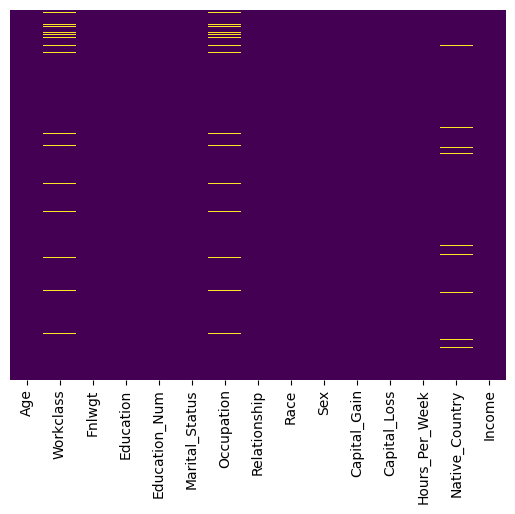

In [15]:
#Plotting null values heatmap
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# 2) Test data

In [16]:
test_data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income            object
dtype: object

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16275 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16275 non-null  int64 
 1   Workclass       15312 non-null  object
 2   Fnlwgt          16275 non-null  int64 
 3   Education       16275 non-null  object
 4   Education_Num   16275 non-null  int64 
 5   Marital_Status  16275 non-null  object
 6   Occupation      15309 non-null  object
 7   Relationship    16275 non-null  object
 8   Race            16275 non-null  object
 9   Sex             16275 non-null  object
 10  Capital_Gain    16275 non-null  int64 
 11  Capital_Loss    16275 non-null  int64 
 12  Hours_Per_Week  16275 non-null  int64 
 13  Native_Country  16001 non-null  object
 14  Income          16275 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [18]:
# Check for missing values 
test_data.isna().any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education_Num     False
Marital_Status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_Gain      False
Capital_Loss      False
Hours_Per_Week    False
Native_Country     True
Income            False
dtype: bool

In [19]:
pd.DataFrame({'sum_missing': test_data.isnull().sum()})

,sum_missing
Age,0
Workclass,963
Fnlwgt,0
Education,0
Education_Num,0
Marital_Status,0
Occupation,966
Relationship,0
Race,0
Sex,0


In [20]:
# Get the percentage of missing values per column 
pd.DataFrame({'percent_missing': test_data.isnull().sum() * 100 / len(test_data)})

,percent_missing
Age,0.000000
Workclass,5.917051
Fnlwgt,0.000000
Education,0.000000
Education_Num,0.000000
Marital_Status,0.000000
Occupation,5.935484
Relationship,0.000000
Race,0.000000
Sex,0.000000


<AxesSubplot:>

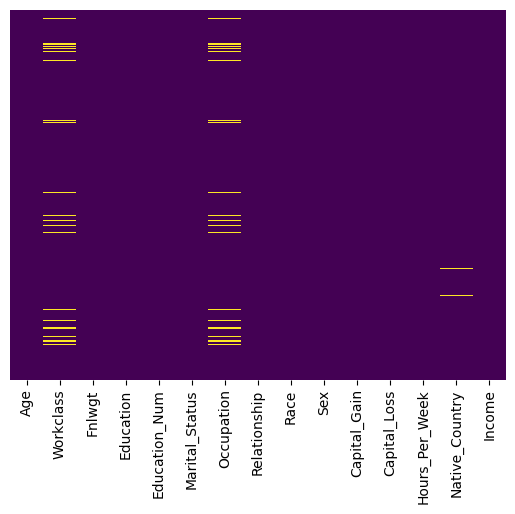

In [21]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Deal with Missing Values 

In [22]:
print(f'missing Workclass values in train data {train_data.Workclass.isna().sum()}')
print(f'missing Age values in test data {test_data.Workclass.isna().sum()}')

missing Workclass values in train data 1836
missing Age values in test data 963


In [23]:
print(f'missing Workclass values in train data {train_data.Occupation.isna().sum()}')
print(f'missing Age values in test data {test_data.Occupation.isna().sum()}')

missing Workclass values in train data 1843
missing Age values in test data 966


In [24]:
print(f'missing Workclass values in train data {train_data.Native_Country.isna().sum()}')
print(f'missing Age values in test data {test_data.Native_Country.isna().sum()}')

missing Workclass values in train data 582
missing Age values in test data 274


Impute Missing Values For Train Data 

In [25]:

#complete Workclass with mode
train_data['Workclass'].fillna(train_data['Workclass'].mode()[0], inplace = True)

#complete Native_Country with mode
train_data['Native_Country'].fillna(train_data['Native_Country'].mode()[0], inplace = True)

#complete missing Occupation with mode
train_data['Occupation'].fillna(train_data['Occupation'].mode()[0], inplace = True)


Impute Missing Values For Test Data 

In [26]:
#complete Workclass with mode
test_data['Workclass'].fillna(test_data['Workclass'].mode()[0], inplace = True)

#complete Native_Country with mode
test_data['Native_Country'].fillna(test_data['Native_Country'].mode()[0], inplace = True)

#complete missing Occupation with mode
test_data['Occupation'].fillna(test_data['Occupation'].mode()[0], inplace = True)


Sanity check to ensure the data have been filled

In [27]:
print(train_data.isnull().sum())
print("-"*20)
print(test_data.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64
--------------------
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64


In [28]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
Education_Num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [29]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,16275.0,38.771736,13.849489,17.0,28.0,37.0,48.0,90.0
Fnlwgt,16275.0,189439.826421,105711.396593,13492.0,116741.0,177828.0,238384.0,1490400.0
Education_Num,16275.0,10.072627,2.567536,1.0,9.0,10.0,12.0,16.0
Capital_Gain,16275.0,1082.303963,7585.305428,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,16275.0,87.931674,403.176055,0.0,0.0,0.0,0.0,3770.0
Hours_Per_Week,16275.0,40.394531,12.479285,1.0,40.0,40.0,45.0,99.0


# EDA

In [30]:
all_columns = list(train_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(train_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

categorical_columns_2 = list(test_data.select_dtypes(include=['object']).columns)
print('Categorical columns for test set:\n {}'.format(categorical_columns))

numerical_columns = list(train_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Income']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country', 'Income']
Categorical columns for test set:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country', 'Income']
Numerical columns:
 ['Age', 'Fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']


In [31]:
train_data["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [32]:
train_data['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32537, dtype: object>

In [33]:
train_data['Income'].value_counts()

 <=50K    24698
 >50K      7839
Name: Income, dtype: int64

So, here there are imbalances since the cases that the income is lower than 50k is significantly greater than being more than 50k. 

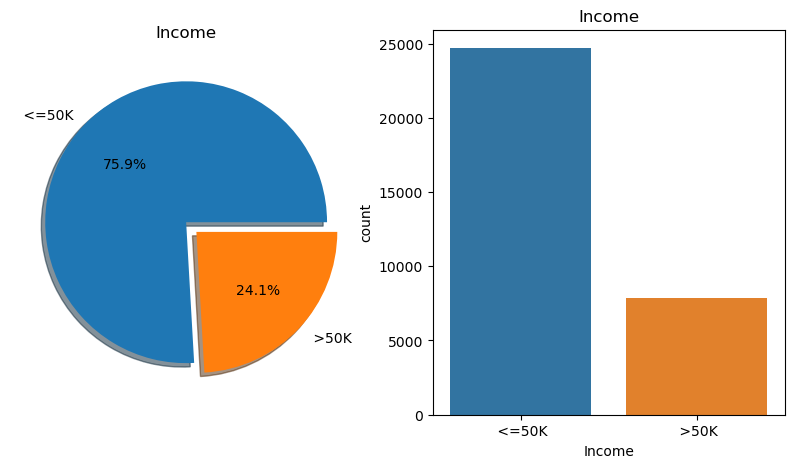

In [34]:
f, ax = plt.subplots(1,2,figsize=(10,5))
train_data['Income'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Income')
ax[0].set_ylabel('')
sns.countplot(x='Income', data=train_data, ax=ax[1])
ax[1].set_title('Income')
plt.show()

# Categorical Column Analysis - Groupby(s)

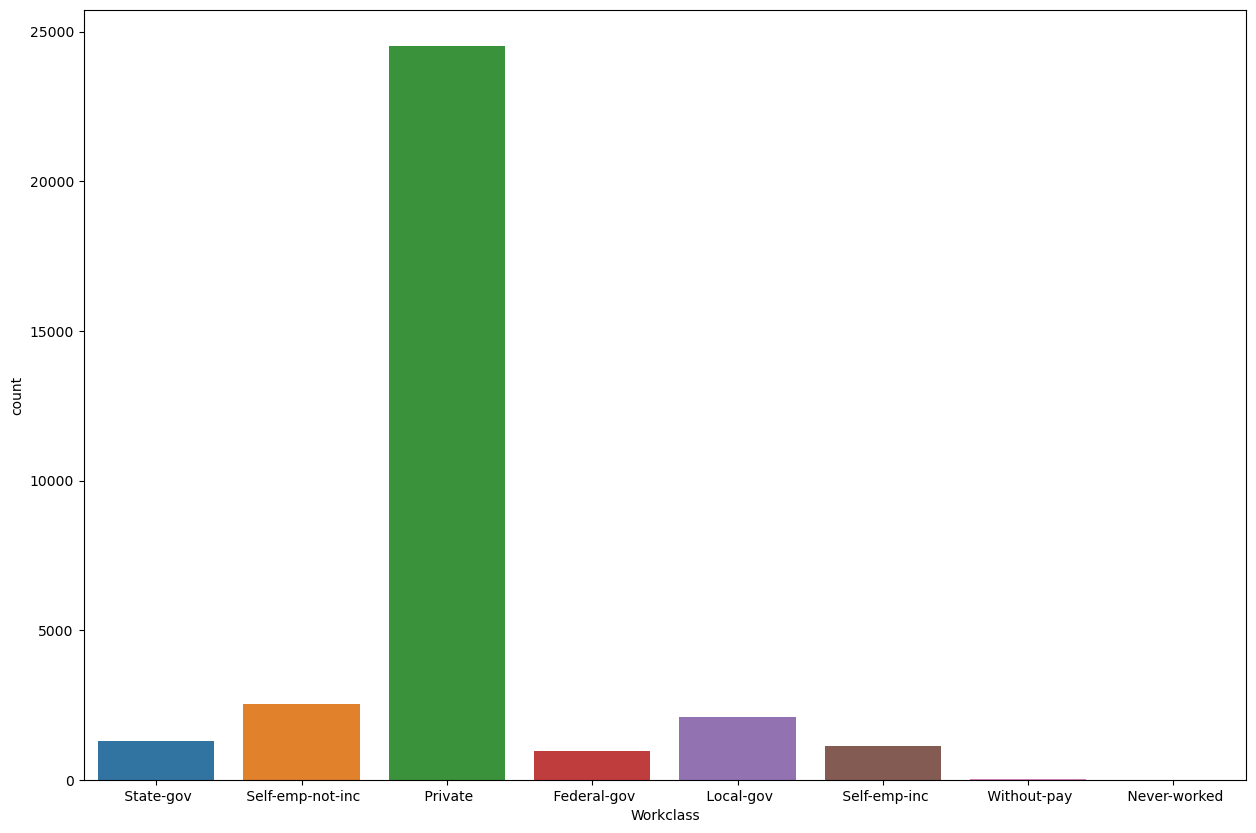

In [35]:
plt.figure(figsize = (15,10))
sns.countplot(train_data['Workclass'])
plt.show()

From the above plot we understand that the dataset contains information of people that mostly belong to the Private Sector. 

In [36]:
train_data['Workclass'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [37]:
train_data.groupby(["Workclass","Income"]).size()

Workclass          Income
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    19357
                    >50K      5152
 Self-emp-inc       <=50K      494
                    >50K       622
 Self-emp-not-inc   <=50K     1816
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
dtype: int64

Here we detect that the people who have never worked or who have worked without pay earns less than 50k which makes perfectly sense. Moreover, the people from private work class seems to have the biggest number of people with income higher than 50k.(but here we have to say that the results are biased since the most of the people in that dataset are from class "Private")

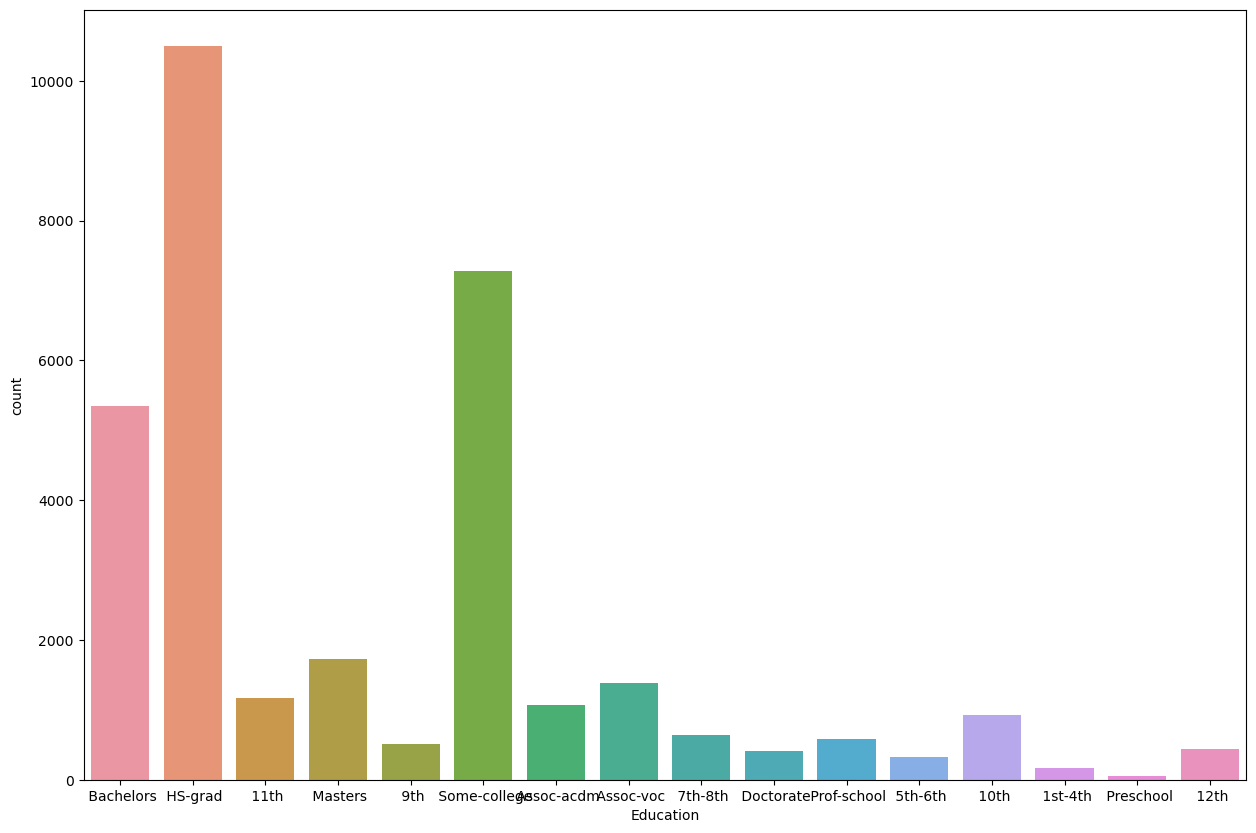

In [38]:
plt.figure(figsize = (15,10))
sns.countplot(train_data[categorical_columns[1]])
plt.show()

Here, we detect that most of the people have HS-grad, or some-college degree. 

In [39]:
train_data['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [40]:
train_data.groupby(['Education', 'Income']).size()

Education      Income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     160
                >50K        6
 5th-6th        <=50K     316
                >50K       16
 7th-8th        <=50K     605
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3132
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8820
                >50K     1674
 Masters        <=50K     763
                >50K      959
 Preschool      <=50K      50
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5896
                >50K     1386
dtype: int64

Here we can detect that the majority of the people with lower level of education usually earn less than 50k, however there are some exceptions on these cases. It is noticed that the majority of people who have invest to higher education such as Master or Doctorate seems to earn higher than 50k.

In [41]:
train_data.groupby(['Education', 'Workclass']).size()

Education      Workclass        
 10th           Federal-gov            6
                Local-gov             31
                Never-worked           2
                Private              795
                Self-emp-inc          19
                                    ... 
 Some-college   Private             5600
                Self-emp-inc         226
                Self-emp-not-inc     485
                State-gov            325
                Without-pay            3
Length: 101, dtype: int64

From the above table we get information about the relationship between workclass and education

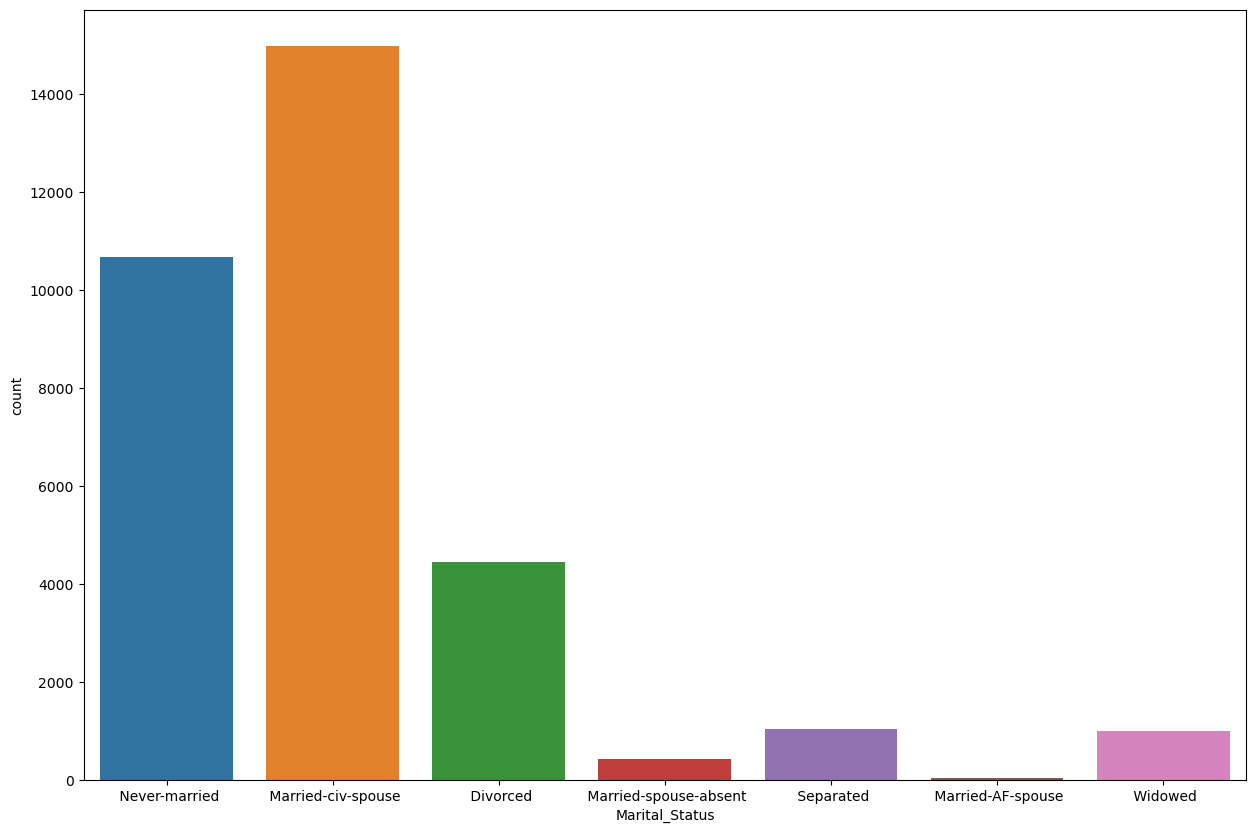

In [42]:
plt.figure(figsize = (15,10))
sns.countplot(train_data[categorical_columns[2]])
plt.show()

Here, we can see that the majority of people from this dataset is married 

In [43]:
train_data['Marital_Status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [44]:
train_data.groupby(['Marital_Status', 'Income']).size()

Marital_Status          Income
 Divorced                <=50K     3978
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8280
                         >50K      6690
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10176
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
dtype: int64

Here, we understand that the most of the people that were never married used to have an income lower than 50k. On the contary, people that are married tend to have equally distributed classes of income

In [45]:
train_data.groupby(['Marital_Status', 'Workclass']).size()

Marital_Status          Workclass        
 Divorced                Federal-gov           168
                         Local-gov             369
                         Never-worked            1
                         Private              3301
                         Self-emp-inc          100
                         Self-emp-not-inc      292
                         State-gov             210
 Married-AF-spouse       Federal-gov             3
                         Private                17
                         Self-emp-not-inc        2
                         State-gov               1
 Married-civ-spouse      Federal-gov           471
                         Local-gov            1023
                         Never-worked            1
                         Private             10363
                         Self-emp-inc          837
                         Self-emp-not-inc     1679
                         State-gov             588
                         Without-pay    

Again, we see that private sector is where the most of the people work.

In [46]:
train_data.groupby(['Marital_Status', 'Education']).size()

Marital_Status  Education    
 Divorced        10th            120
                 11th            130
                 12th             39
                 1st-4th          10
                 5th-6th          20
                                ... 
 Widowed         HS-grad         414
                 Masters          41
                 Preschool         3
                 Prof-school       5
                 Some-college    172
Length: 101, dtype: int64

Here, we can see the relationship between level of education and martial status

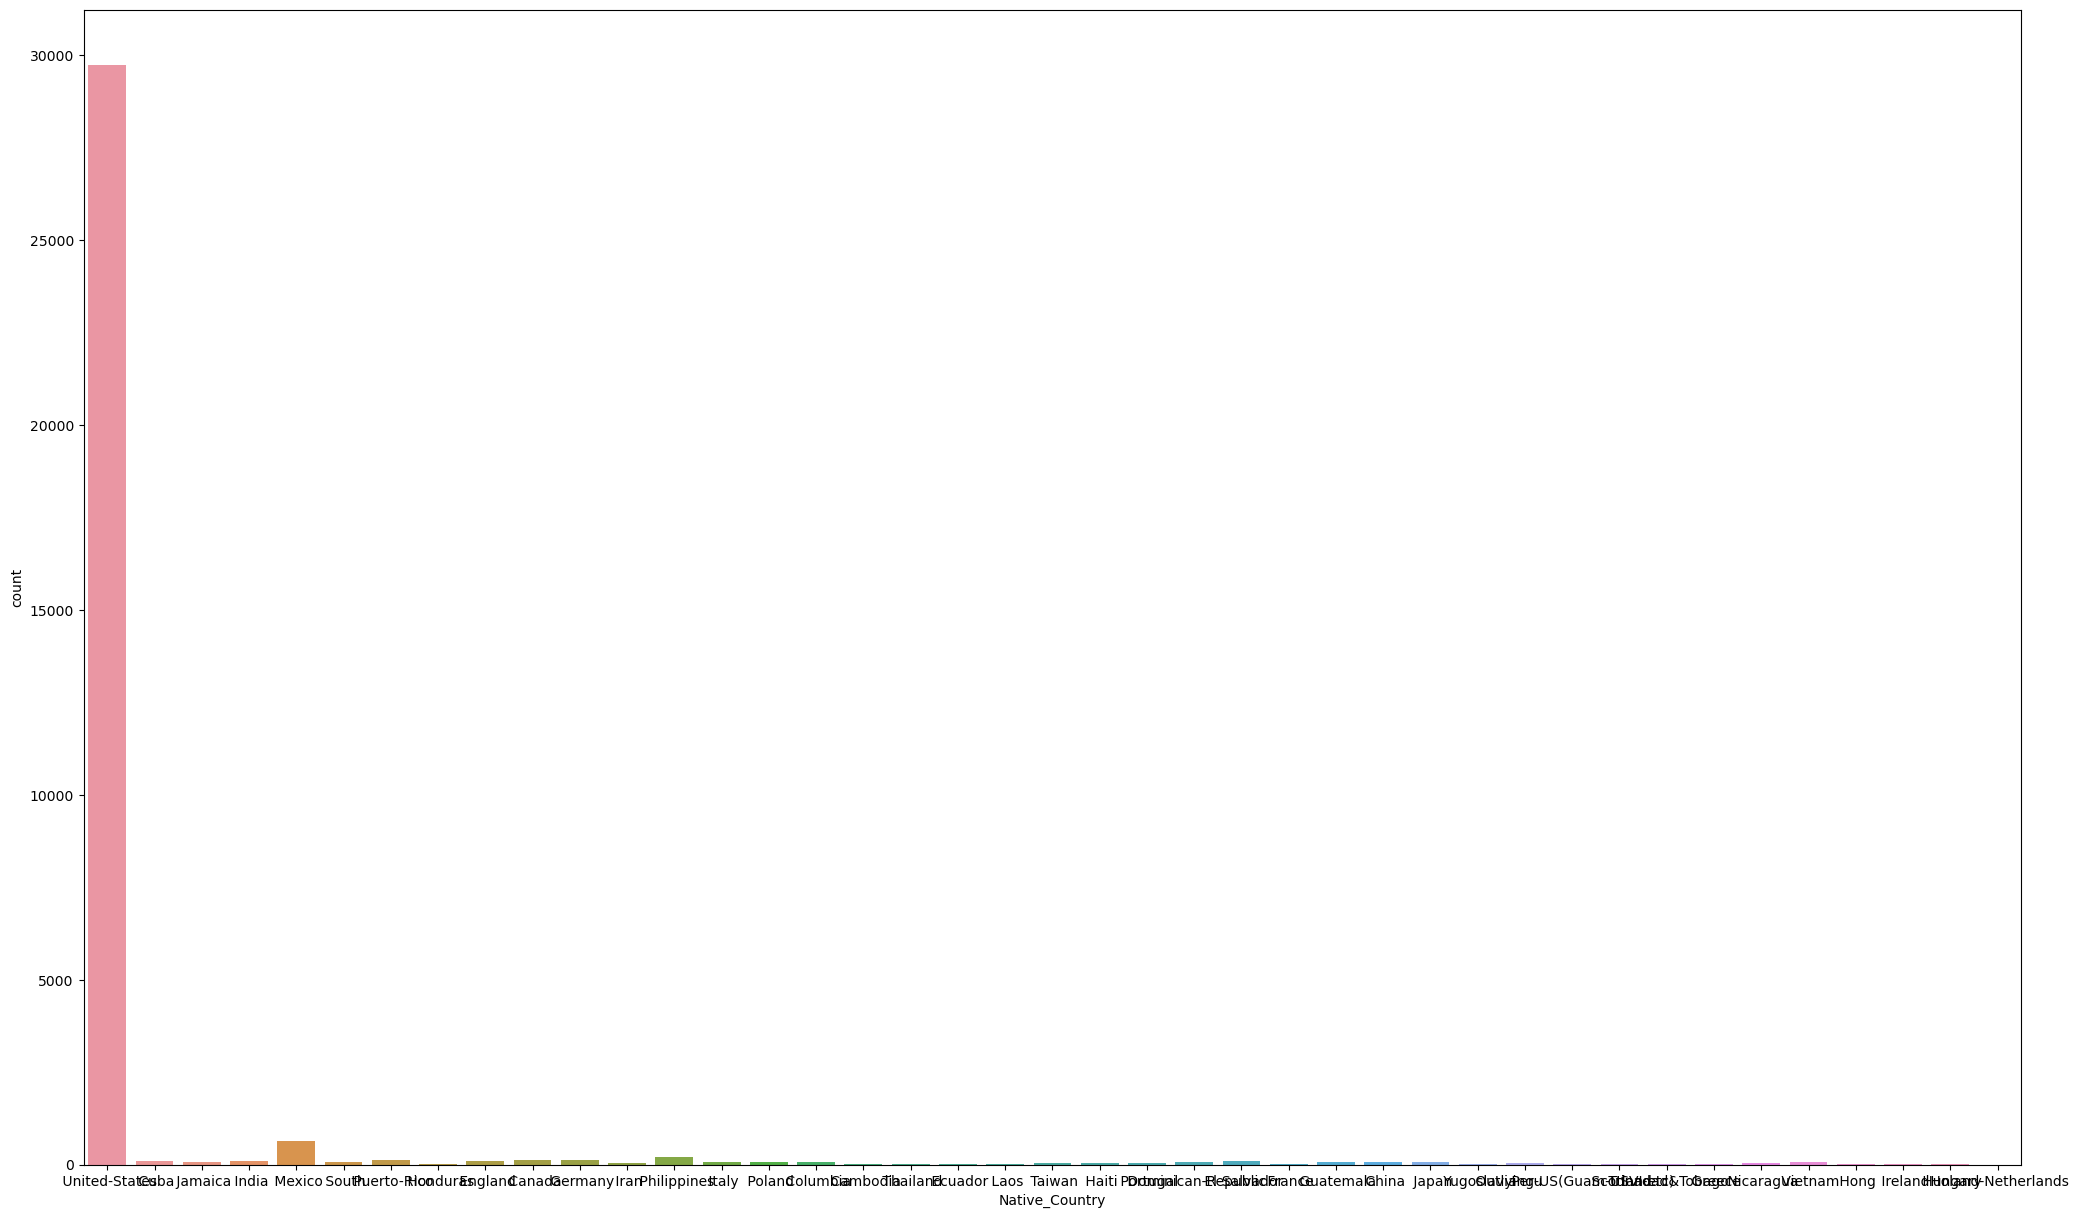

In [47]:
plt.figure(figsize=(25,15))
sns.countplot(train_data['Native_Country'])
plt.show()

We can also detect that the dataset is mostly about people from United States.

In [48]:
train_data['Native_Country'].value_counts()

 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [49]:
train_data['Occupation'].value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [50]:
train_data.groupby(['Occupation', 'Education']).size()

Occupation         Education    
 Adm-clerical       10th             38
                    11th             67
                    12th             38
                    5th-6th           6
                    7th-8th          11
                                   ... 
 Transport-moving   Doctorate         1
                    HS-grad         825
                    Masters          10
                    Prof-school       3
                    Some-college    283
Length: 201, dtype: int64

Here, we can detect the relationship between Occupation and education 

In [51]:
train_data.groupby(['Occupation', 'Workclass']).size()

Occupation         Workclass        
 Adm-clerical       Federal-gov          317
                    Local-gov            283
                    Private             2831
                    Self-emp-inc          31
                    Self-emp-not-inc      50
                                        ... 
 Transport-moving   Private             1266
                    Self-emp-inc          27
                    Self-emp-not-inc     122
                    State-gov             41
                    Without-pay            1
Length: 82, dtype: int64

Here, we can detect the relationship between Occupation and Workclass

<AxesSubplot:xlabel='Race', ylabel='count'>

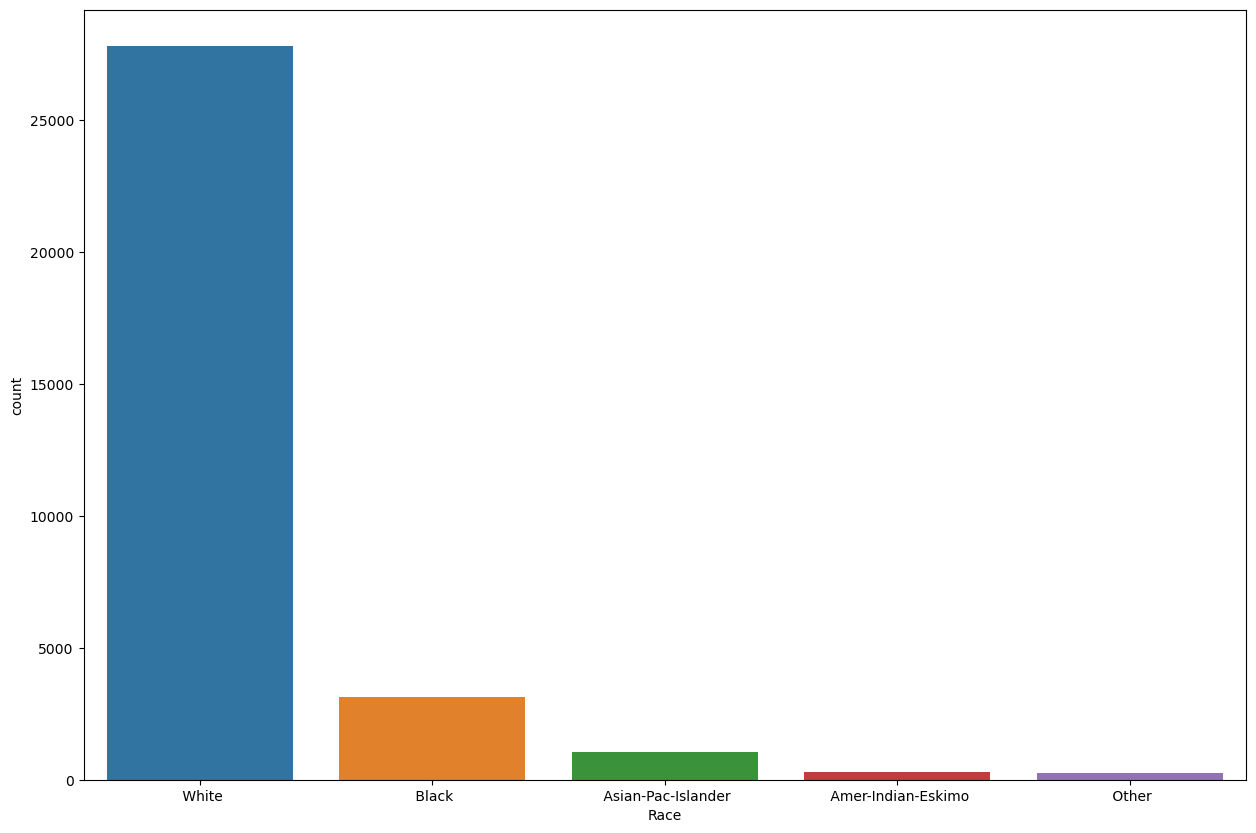

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Race'])

Here, we realize that this dataset mostly contains people that are "white" in color.

In [53]:
train_data.groupby(['Race', 'Income']).size()

Race                 Income
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      762
                      >50K       276
 Black                <=50K     2735
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20680
                      >50K      7115
dtype: int64

We see that mostly "white" and "Asian-Pac-Islanders" earn greater than 50k in comparison to the other races

In [54]:
train_data.groupby(['Race', 'Education']).size()

Race                 Education    
 Amer-Indian-Eskimo   10th              16
                      11th              14
                      12th               5
                      1st-4th            4
                      5th-6th            2
                                      ... 
 White                HS-grad         8898
                      Masters         1536
                      Preschool         37
                      Prof-school      514
                      Some-college    6200
Length: 79, dtype: int64

Here, we can detect the relationship between "Race" and "Education" 

<AxesSubplot:xlabel='Sex', ylabel='count'>

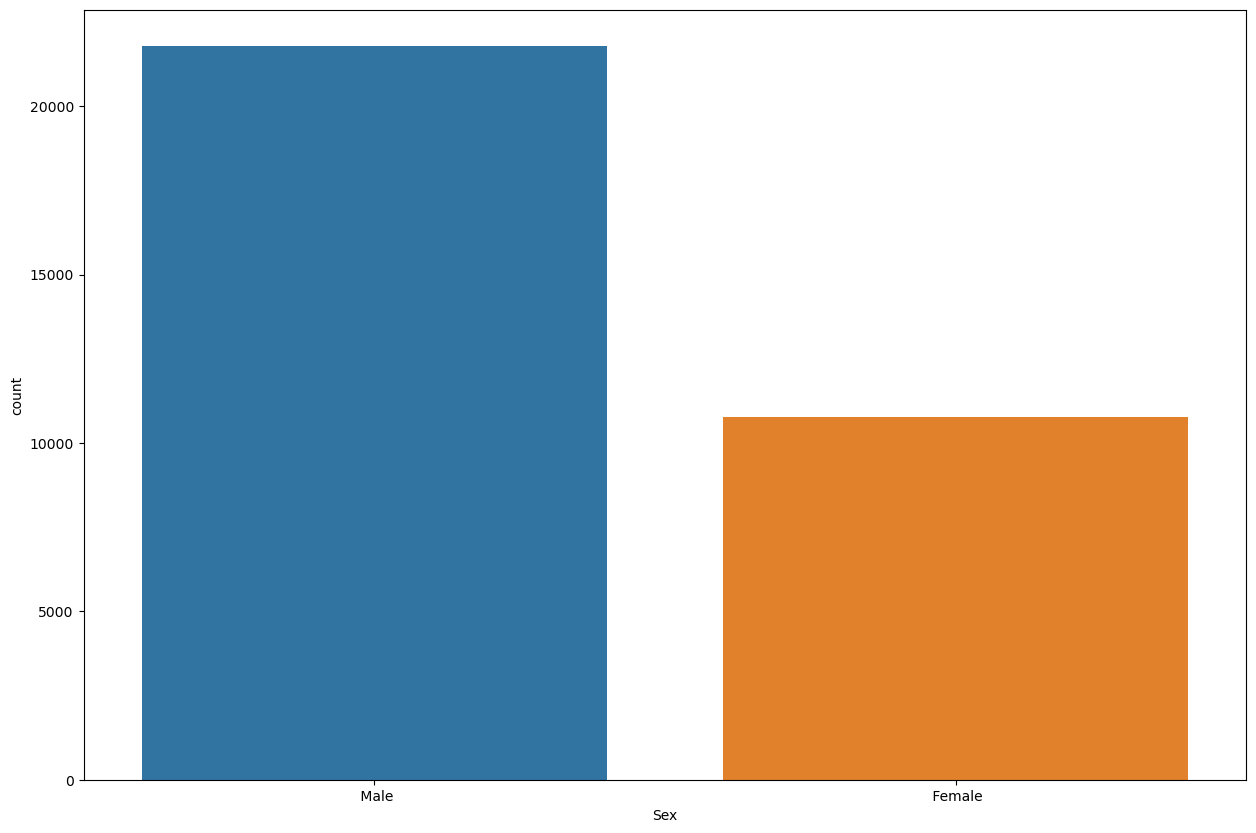

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Sex'])

From the above plot we realize that the dataset is highly biased since contains mostly the sex: male

In [56]:
train_data.groupby(['Sex', 'Income']).size()

Sex      Income
 Female   <=50K     9583
          >50K      1179
 Male     <=50K    15115
          >50K      6660
dtype: int64

From the above table we see that male seems to earn more than female

In [57]:
train_data.groupby(['Education', 'Sex']).size()

Education      Sex    
 10th           Female     295
                Male       638
 11th           Female     432
                Male       743
 12th           Female     144
                Male       289
 1st-4th        Female      44
                Male       122
 5th-6th        Female      84
                Male       248
 7th-8th        Female     160
                Male       485
 9th            Female     144
                Male       370
 Assoc-acdm     Female     421
                Male       646
 Assoc-voc      Female     500
                Male       882
 Bachelors      Female    1618
                Male      3735
 Doctorate      Female      86
                Male       327
 HS-grad        Female    3388
                Male      7106
 Masters        Female     536
                Male      1186
 Preschool      Female      16
                Male        34
 Prof-school    Female      92
                Male       484
 Some-college   Female    2802
                

In [58]:
train_data.groupby(['Occupation', 'Sex']).size()

Occupation          Sex    
 Adm-clerical        Female    2535
                     Male      1233
 Armed-Forces        Male         9
 Craft-repair        Female     222
                     Male      3872
 Exec-managerial     Female    1159
                     Male      2906
 Farming-fishing     Female      65
                     Male       927
 Handlers-cleaners   Female     164
                     Male      1205
 Machine-op-inspct   Female     549
                     Male      1451
 Other-service       Female    1799
                     Male      1492
 Priv-house-serv     Female     139
                     Male         8
 Prof-specialty      Female    2354
                     Male      3625
 Protective-serv     Female      76
                     Male       573
 Sales               Female    1263
                     Male      2387
 Tech-support        Female     347
                     Male       580
 Transport-moving    Female      90
                     Male      1507


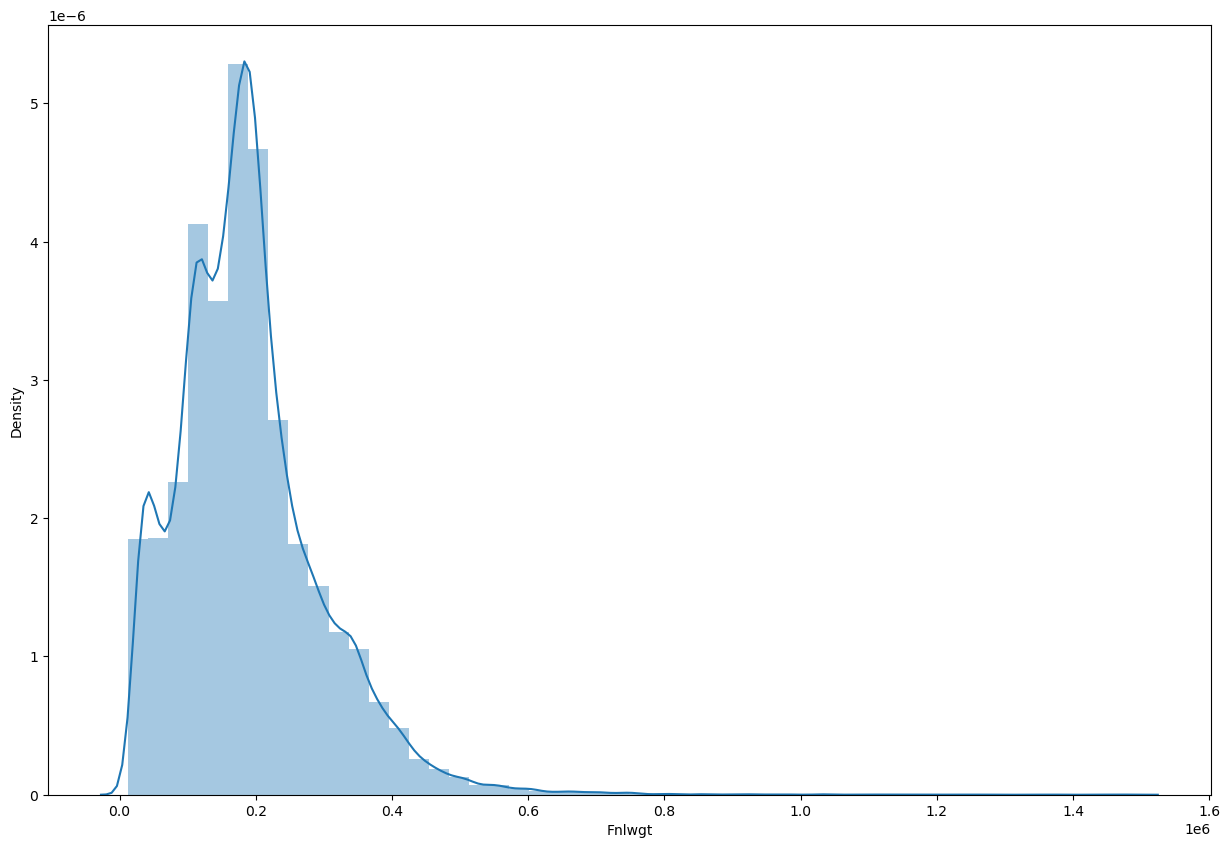

In [59]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Fnlwgt'])
plt.show()

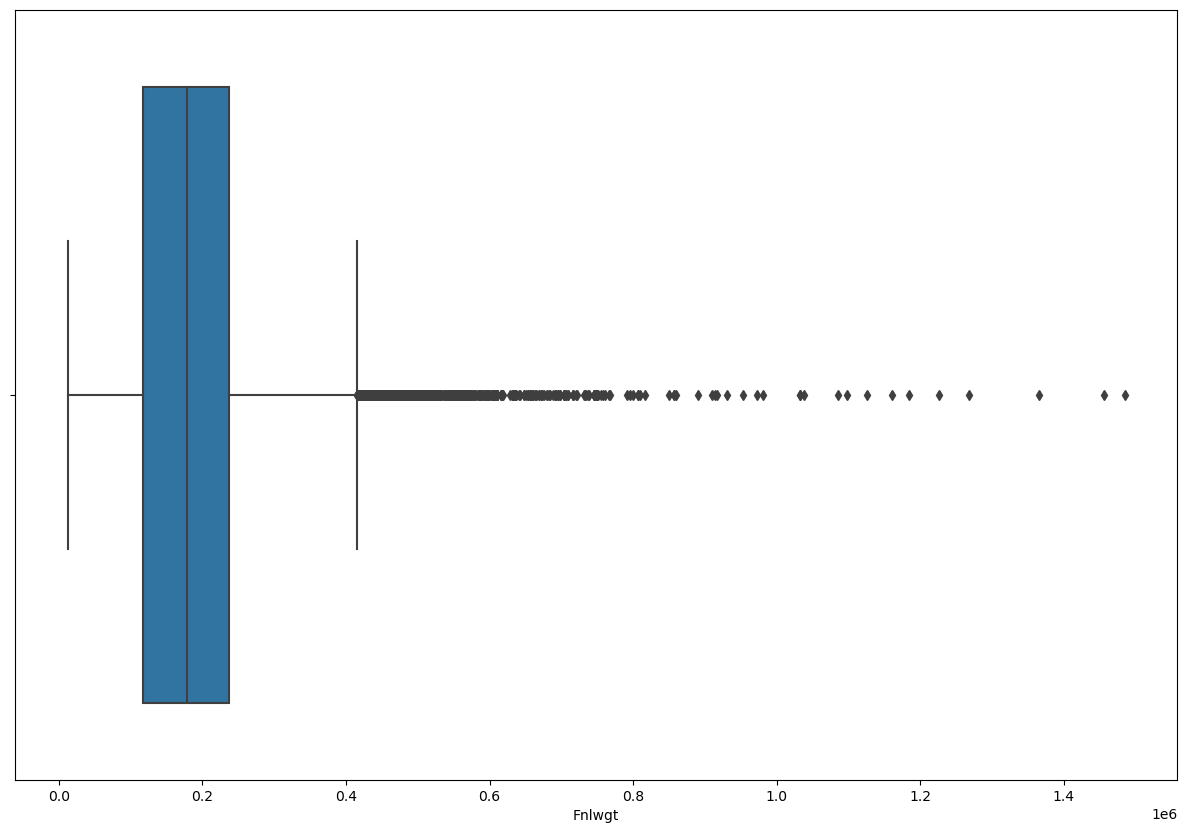

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Fnlwgt'])
plt.show()

In this feature we detect numerous outliers

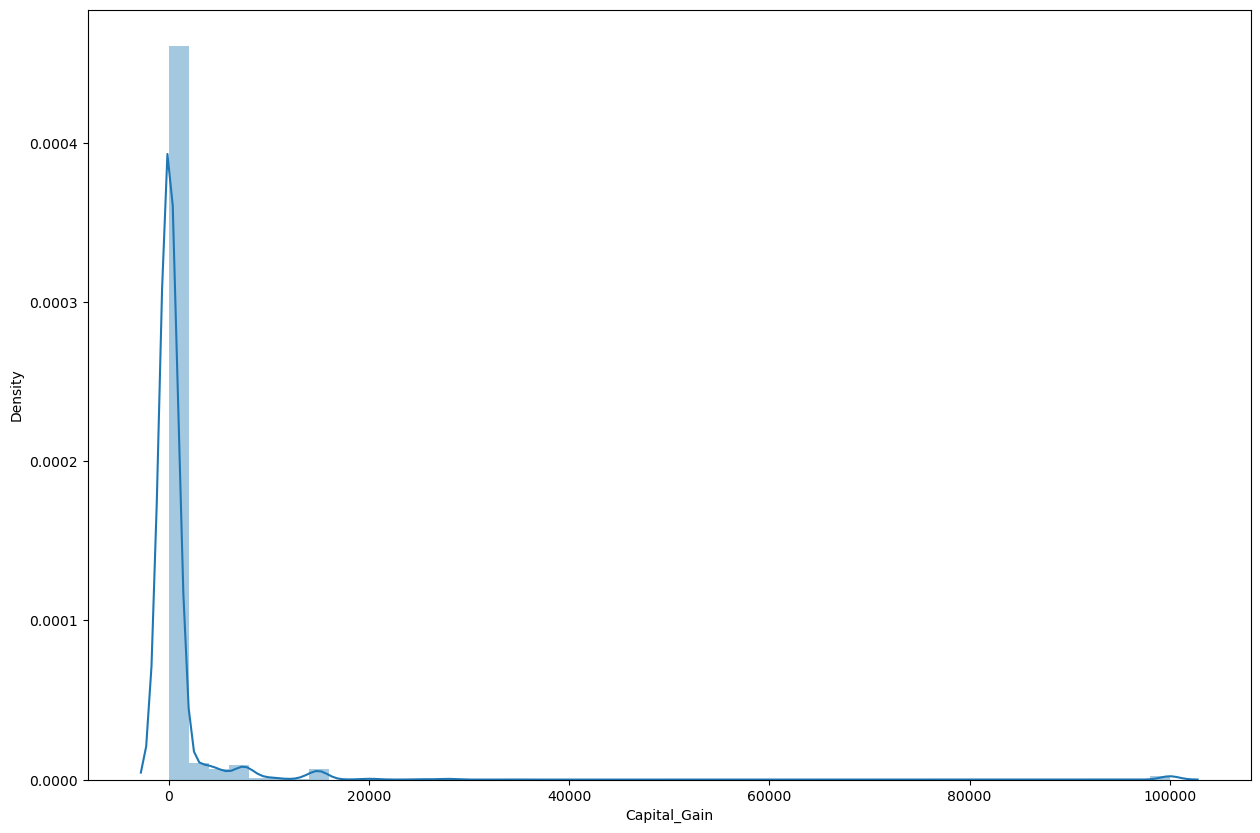

In [61]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Capital_Gain'])
plt.show()

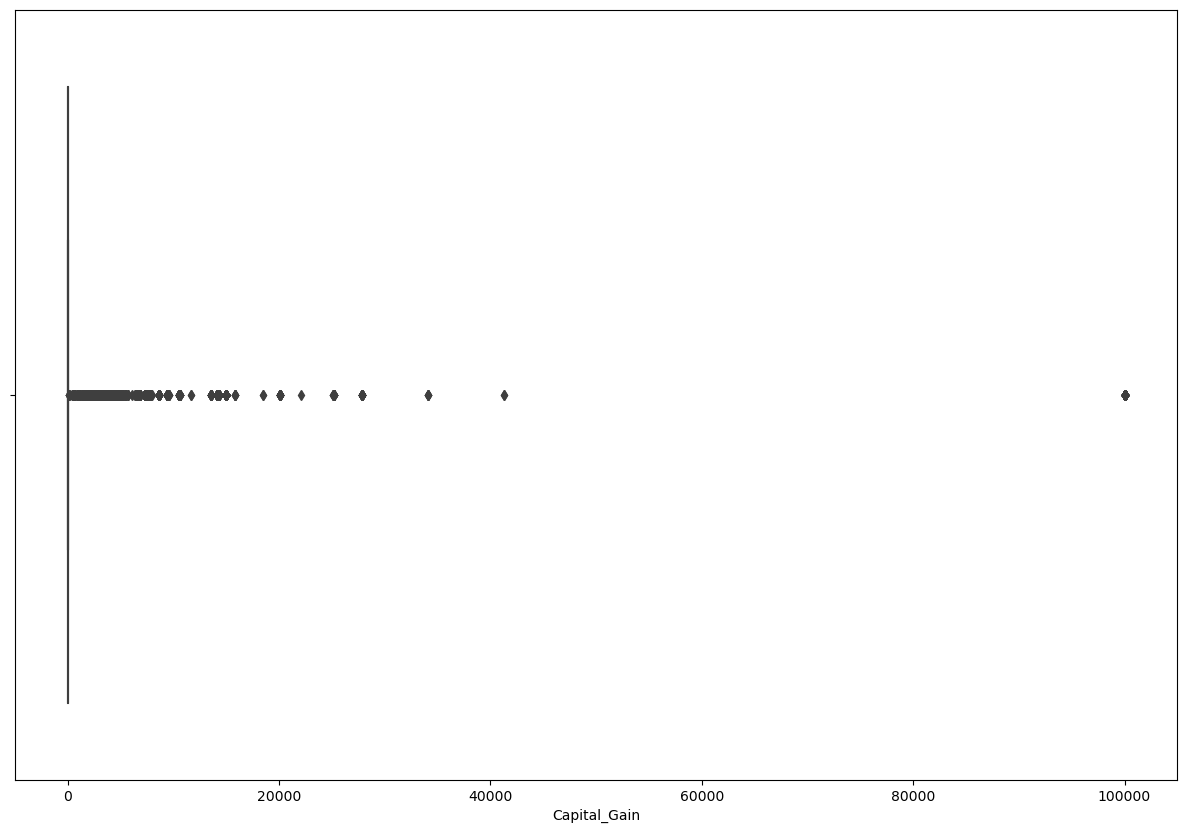

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Capital_Gain'])
plt.show()

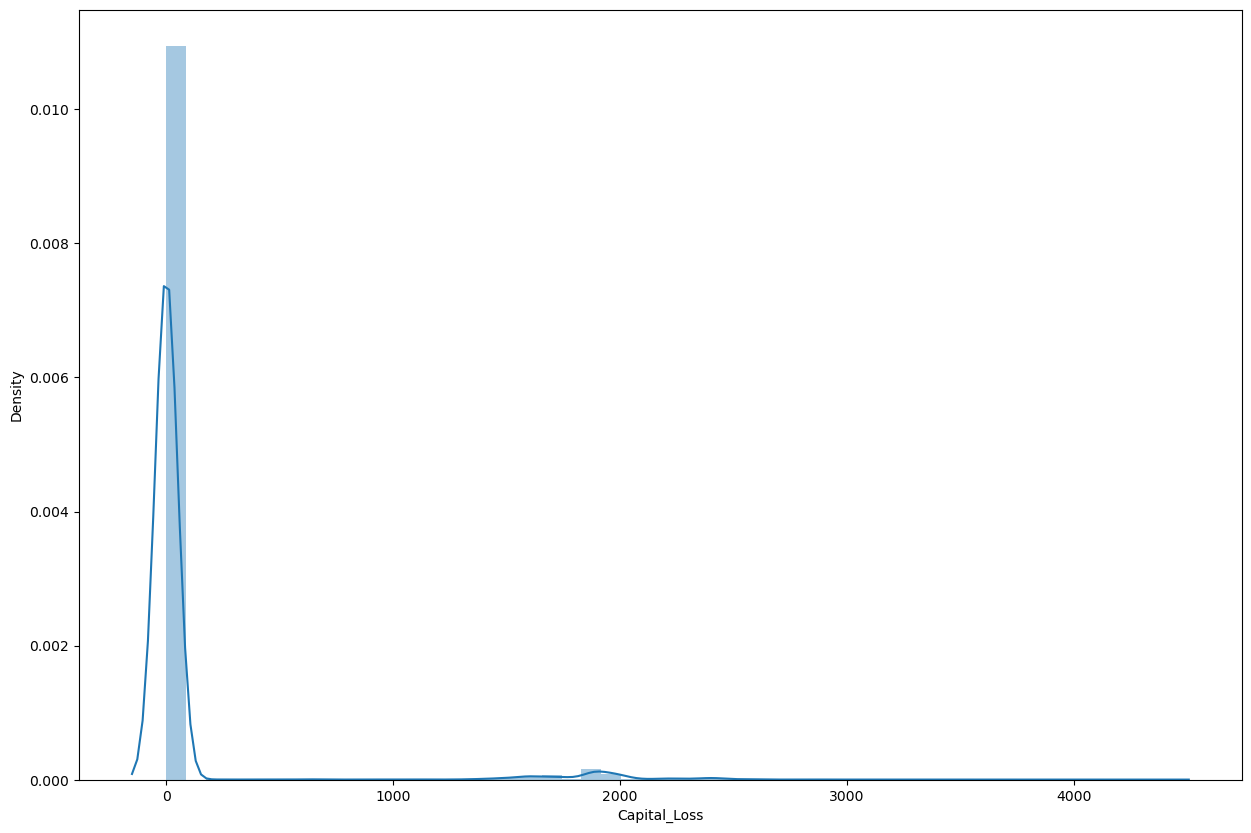

In [63]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Capital_Loss'])
plt.show()

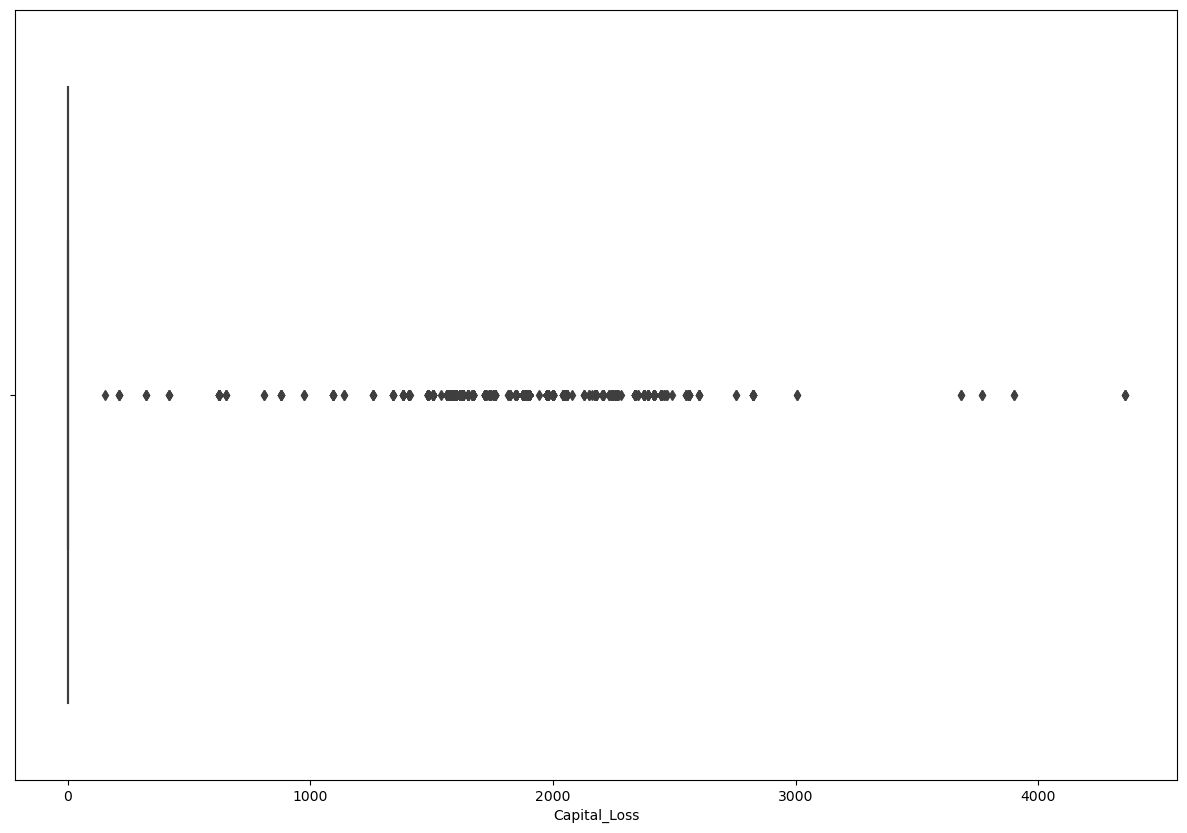

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Capital_Loss'])
plt.show()

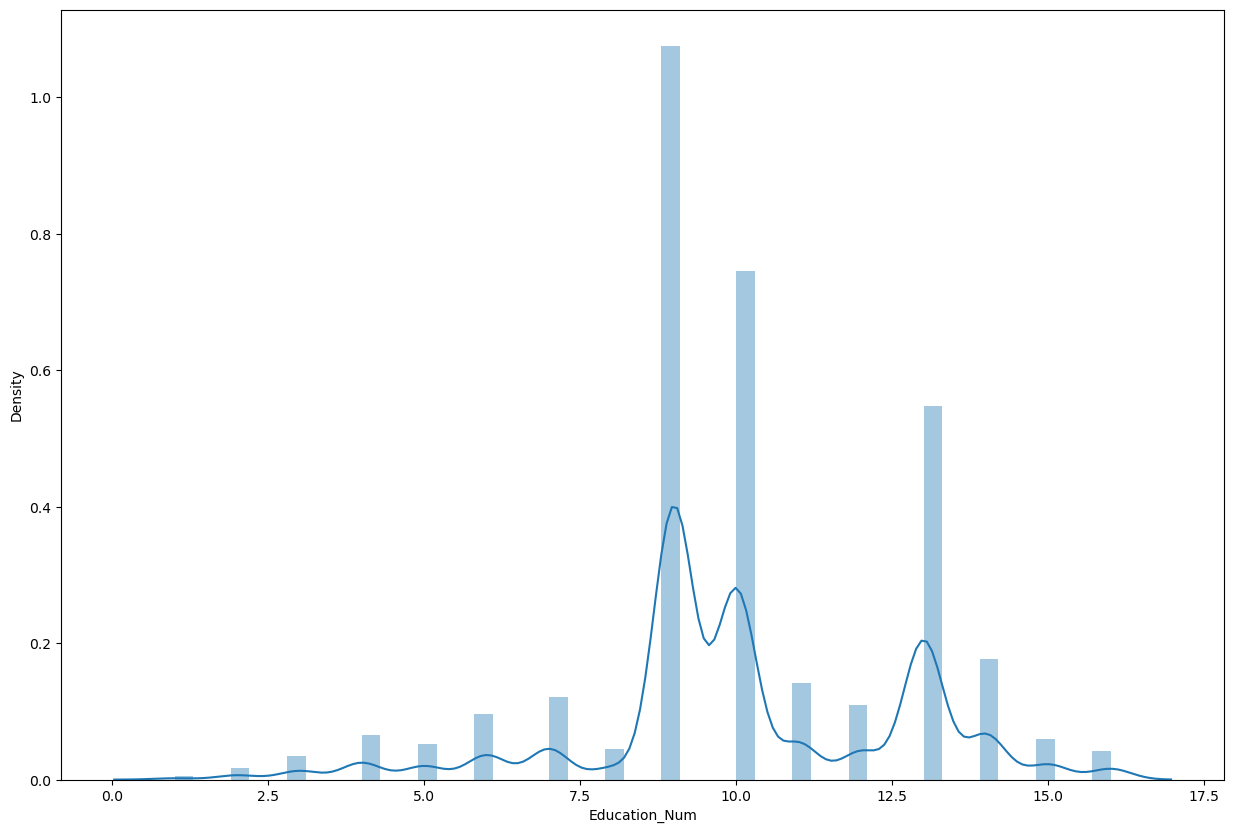

In [65]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Education_Num'])
plt.show()

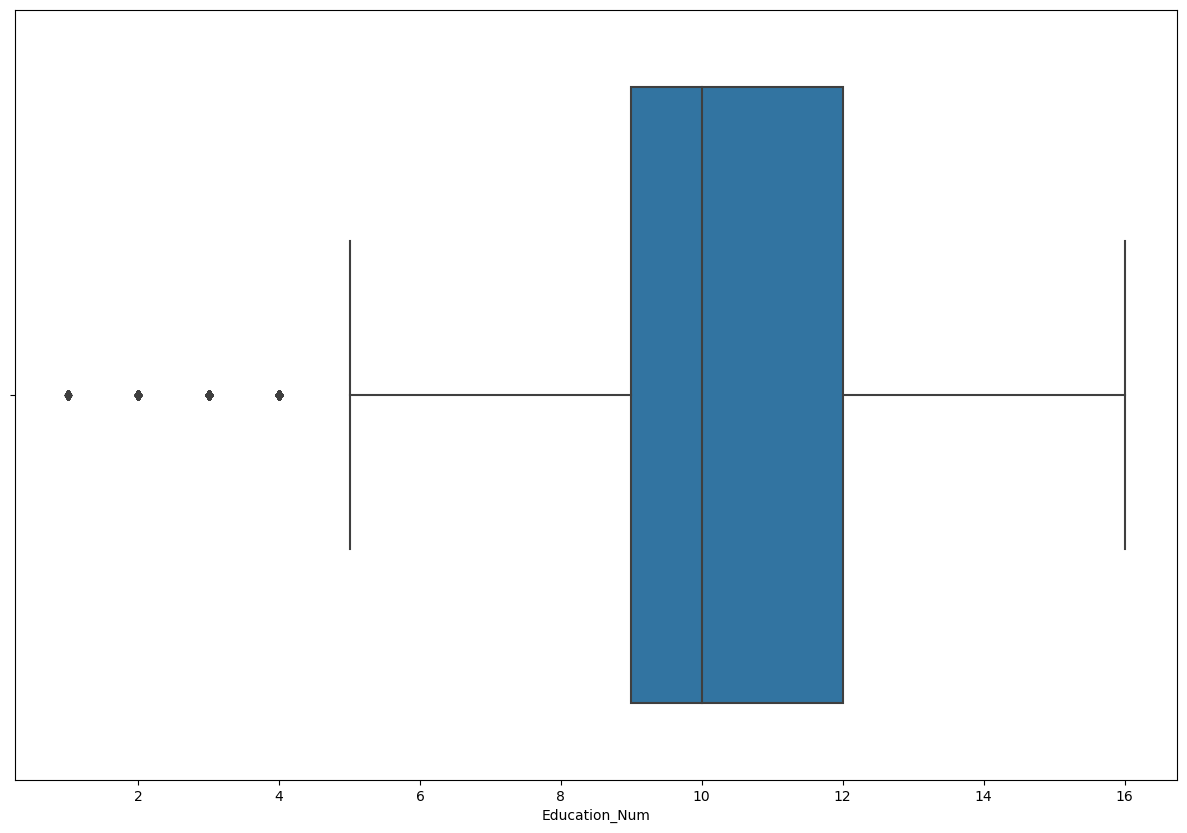

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Education_Num'])
plt.show()

The most of the people seems to be in range 9 to 12 which is thr HS-grad part of the graph

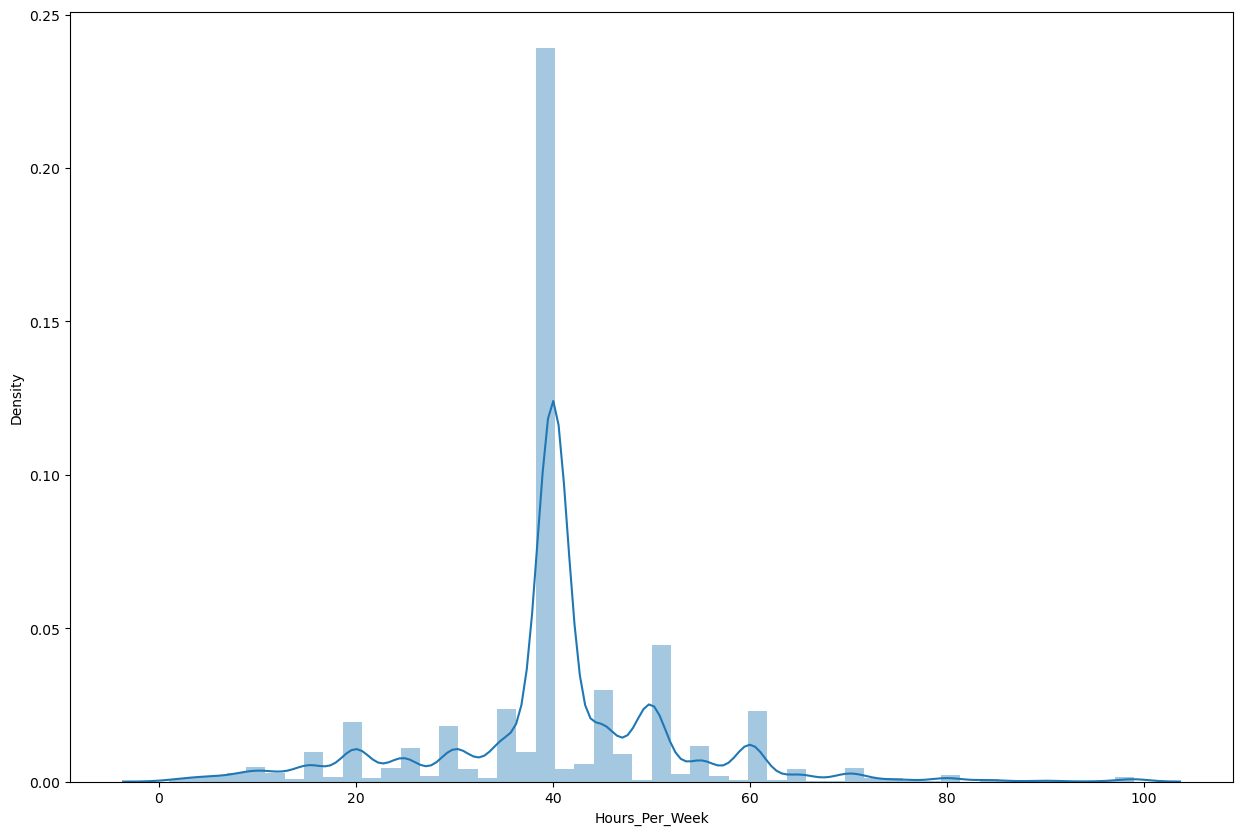

In [67]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Hours_Per_Week'])
plt.show()

Here, we see that the most of the people work 40 hours per week

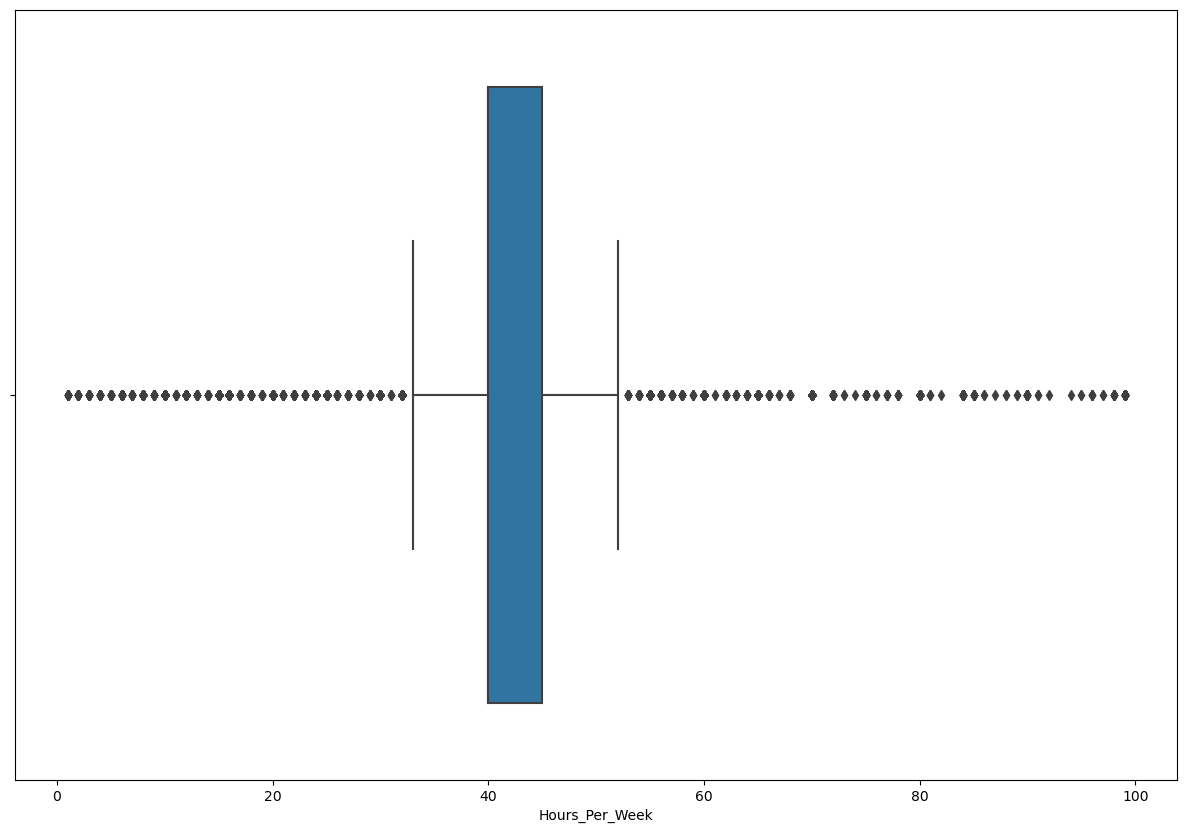

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Hours_Per_Week'])
plt.show()

Here we detect some extreme values of people who work way more or way less than the majority

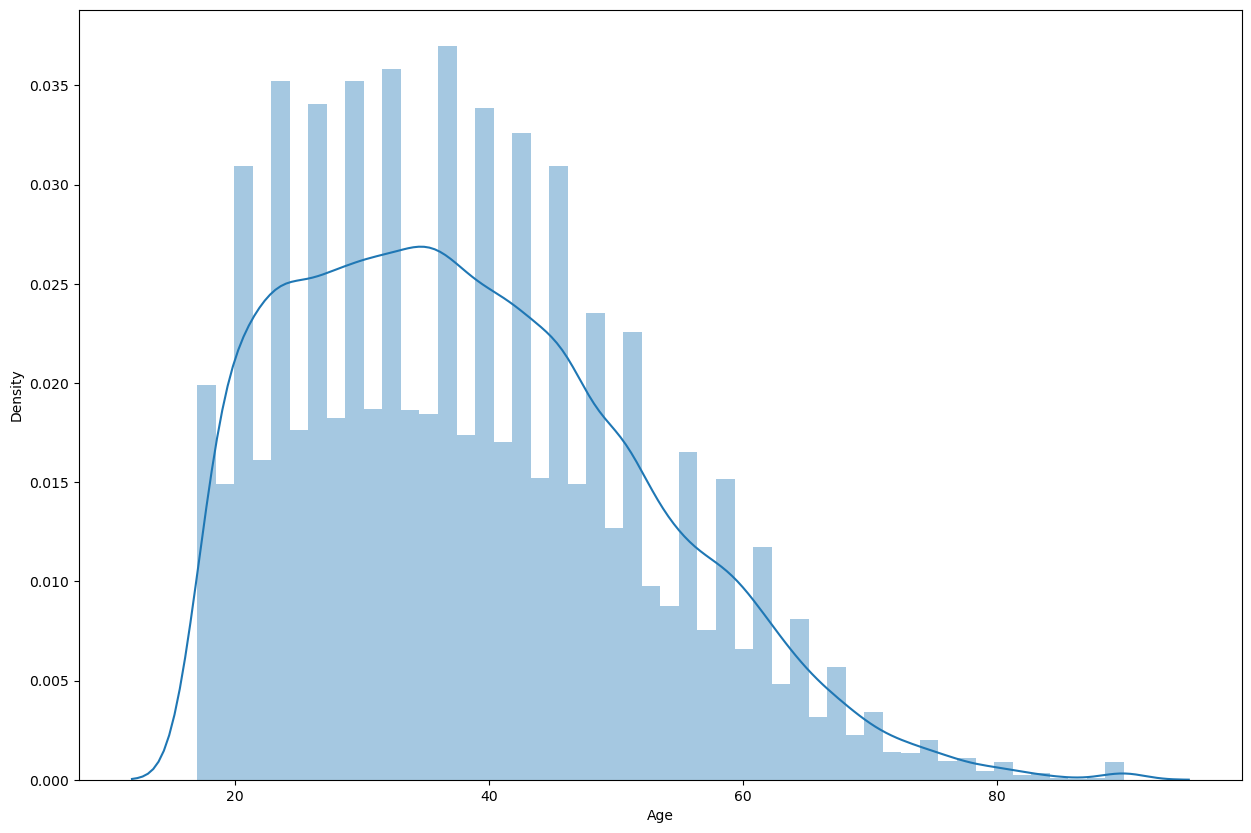

In [69]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Age'])
plt.show()

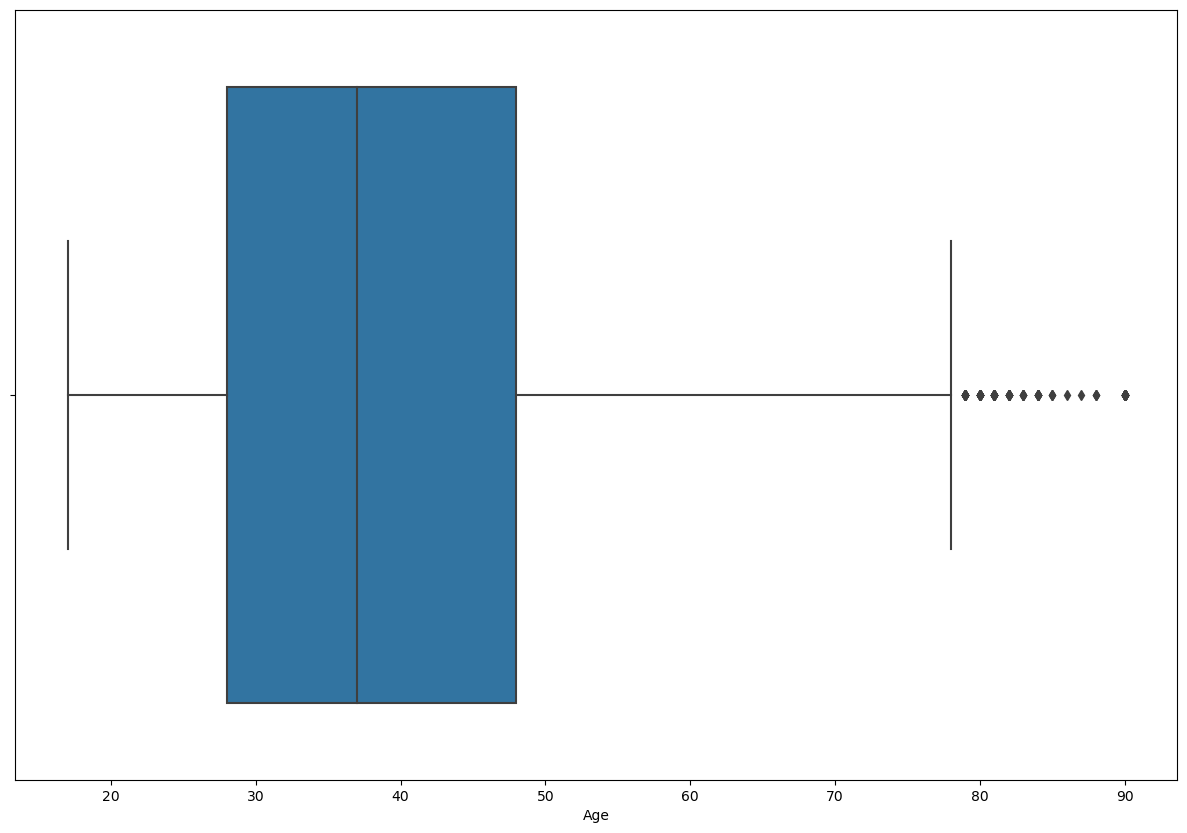

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Age'])
plt.show()

We see that most people who work are within the age group of 17 to a little less than 80

# Check for correlations in the data

In [71]:
train_data.corr()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
Education_Num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
Capital_Gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
Capital_Loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
Hours_Per_Week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


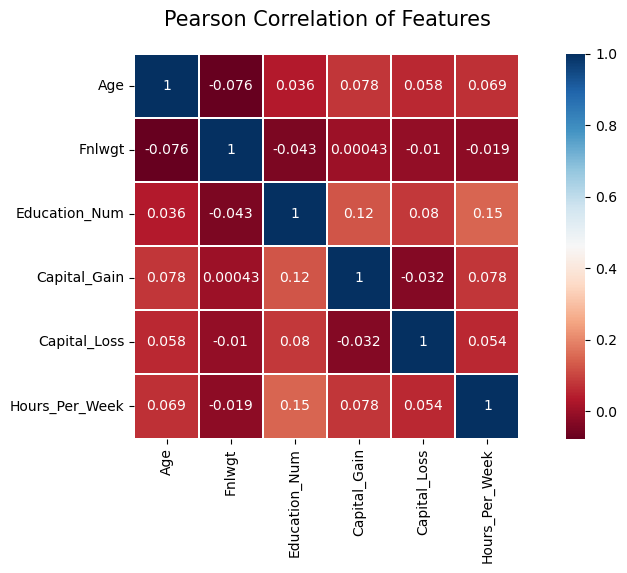

In [72]:
plt.figure(figsize=(12,5))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show();

There are not detected any strong positive or negative correlation between the given features for the train set 

In [73]:
test_data.corr()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076490,0.019952,0.076346,0.055245,0.076828
Fnlwgt,-0.076490,1.000000,-0.029603,-0.011761,0.007379,-0.002892
Education_Num,0.019952,-0.029603,1.000000,0.130133,0.083117,0.134862
Capital_Gain,0.076346,-0.011761,0.130133,1.000000,-0.031121,0.089381
Capital_Loss,0.055245,0.007379,0.083117,-0.031121,1.000000,0.054861
Hours_Per_Week,0.076828,-0.002892,0.134862,0.089381,0.054861,1.000000


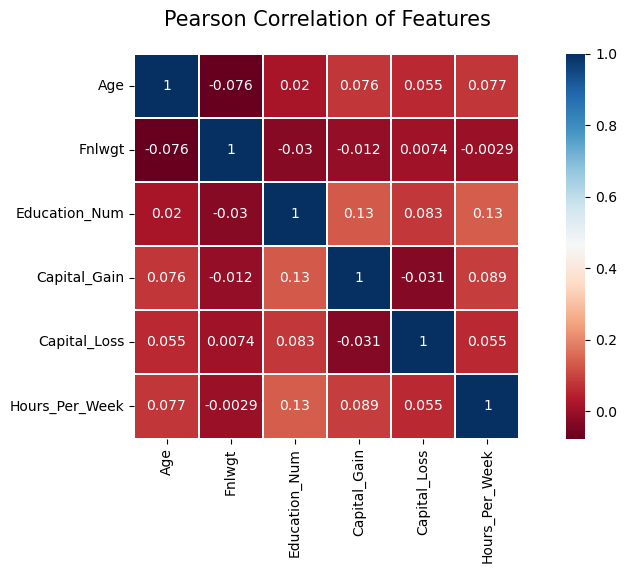

In [74]:
plt.figure(figsize=(12,5))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(test_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show();

There are not detected any strong positive or negative correlation between the given features for the test set as well

Check for Imbalances 

<Figure size 2000x1000 with 0 Axes>

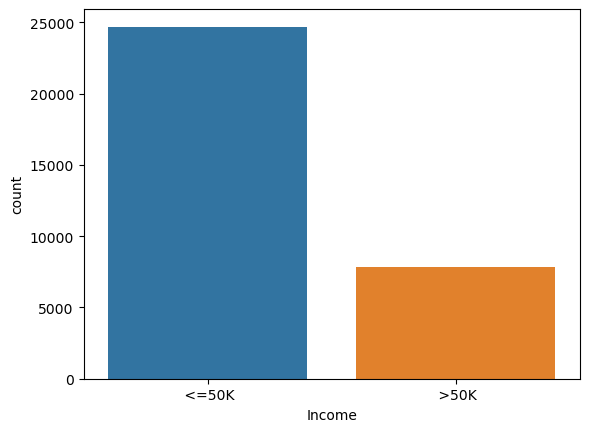

<Figure size 2000x1000 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt
sns.countplot(x="Income", data=train_data)
plt.figure(figsize=(20,10))

From the above plot, it's understandable that most of the people from this dataset have income less than 50k, in comparison with the number of people that have income greater than 50k, which means that the dataset have imbalances. 

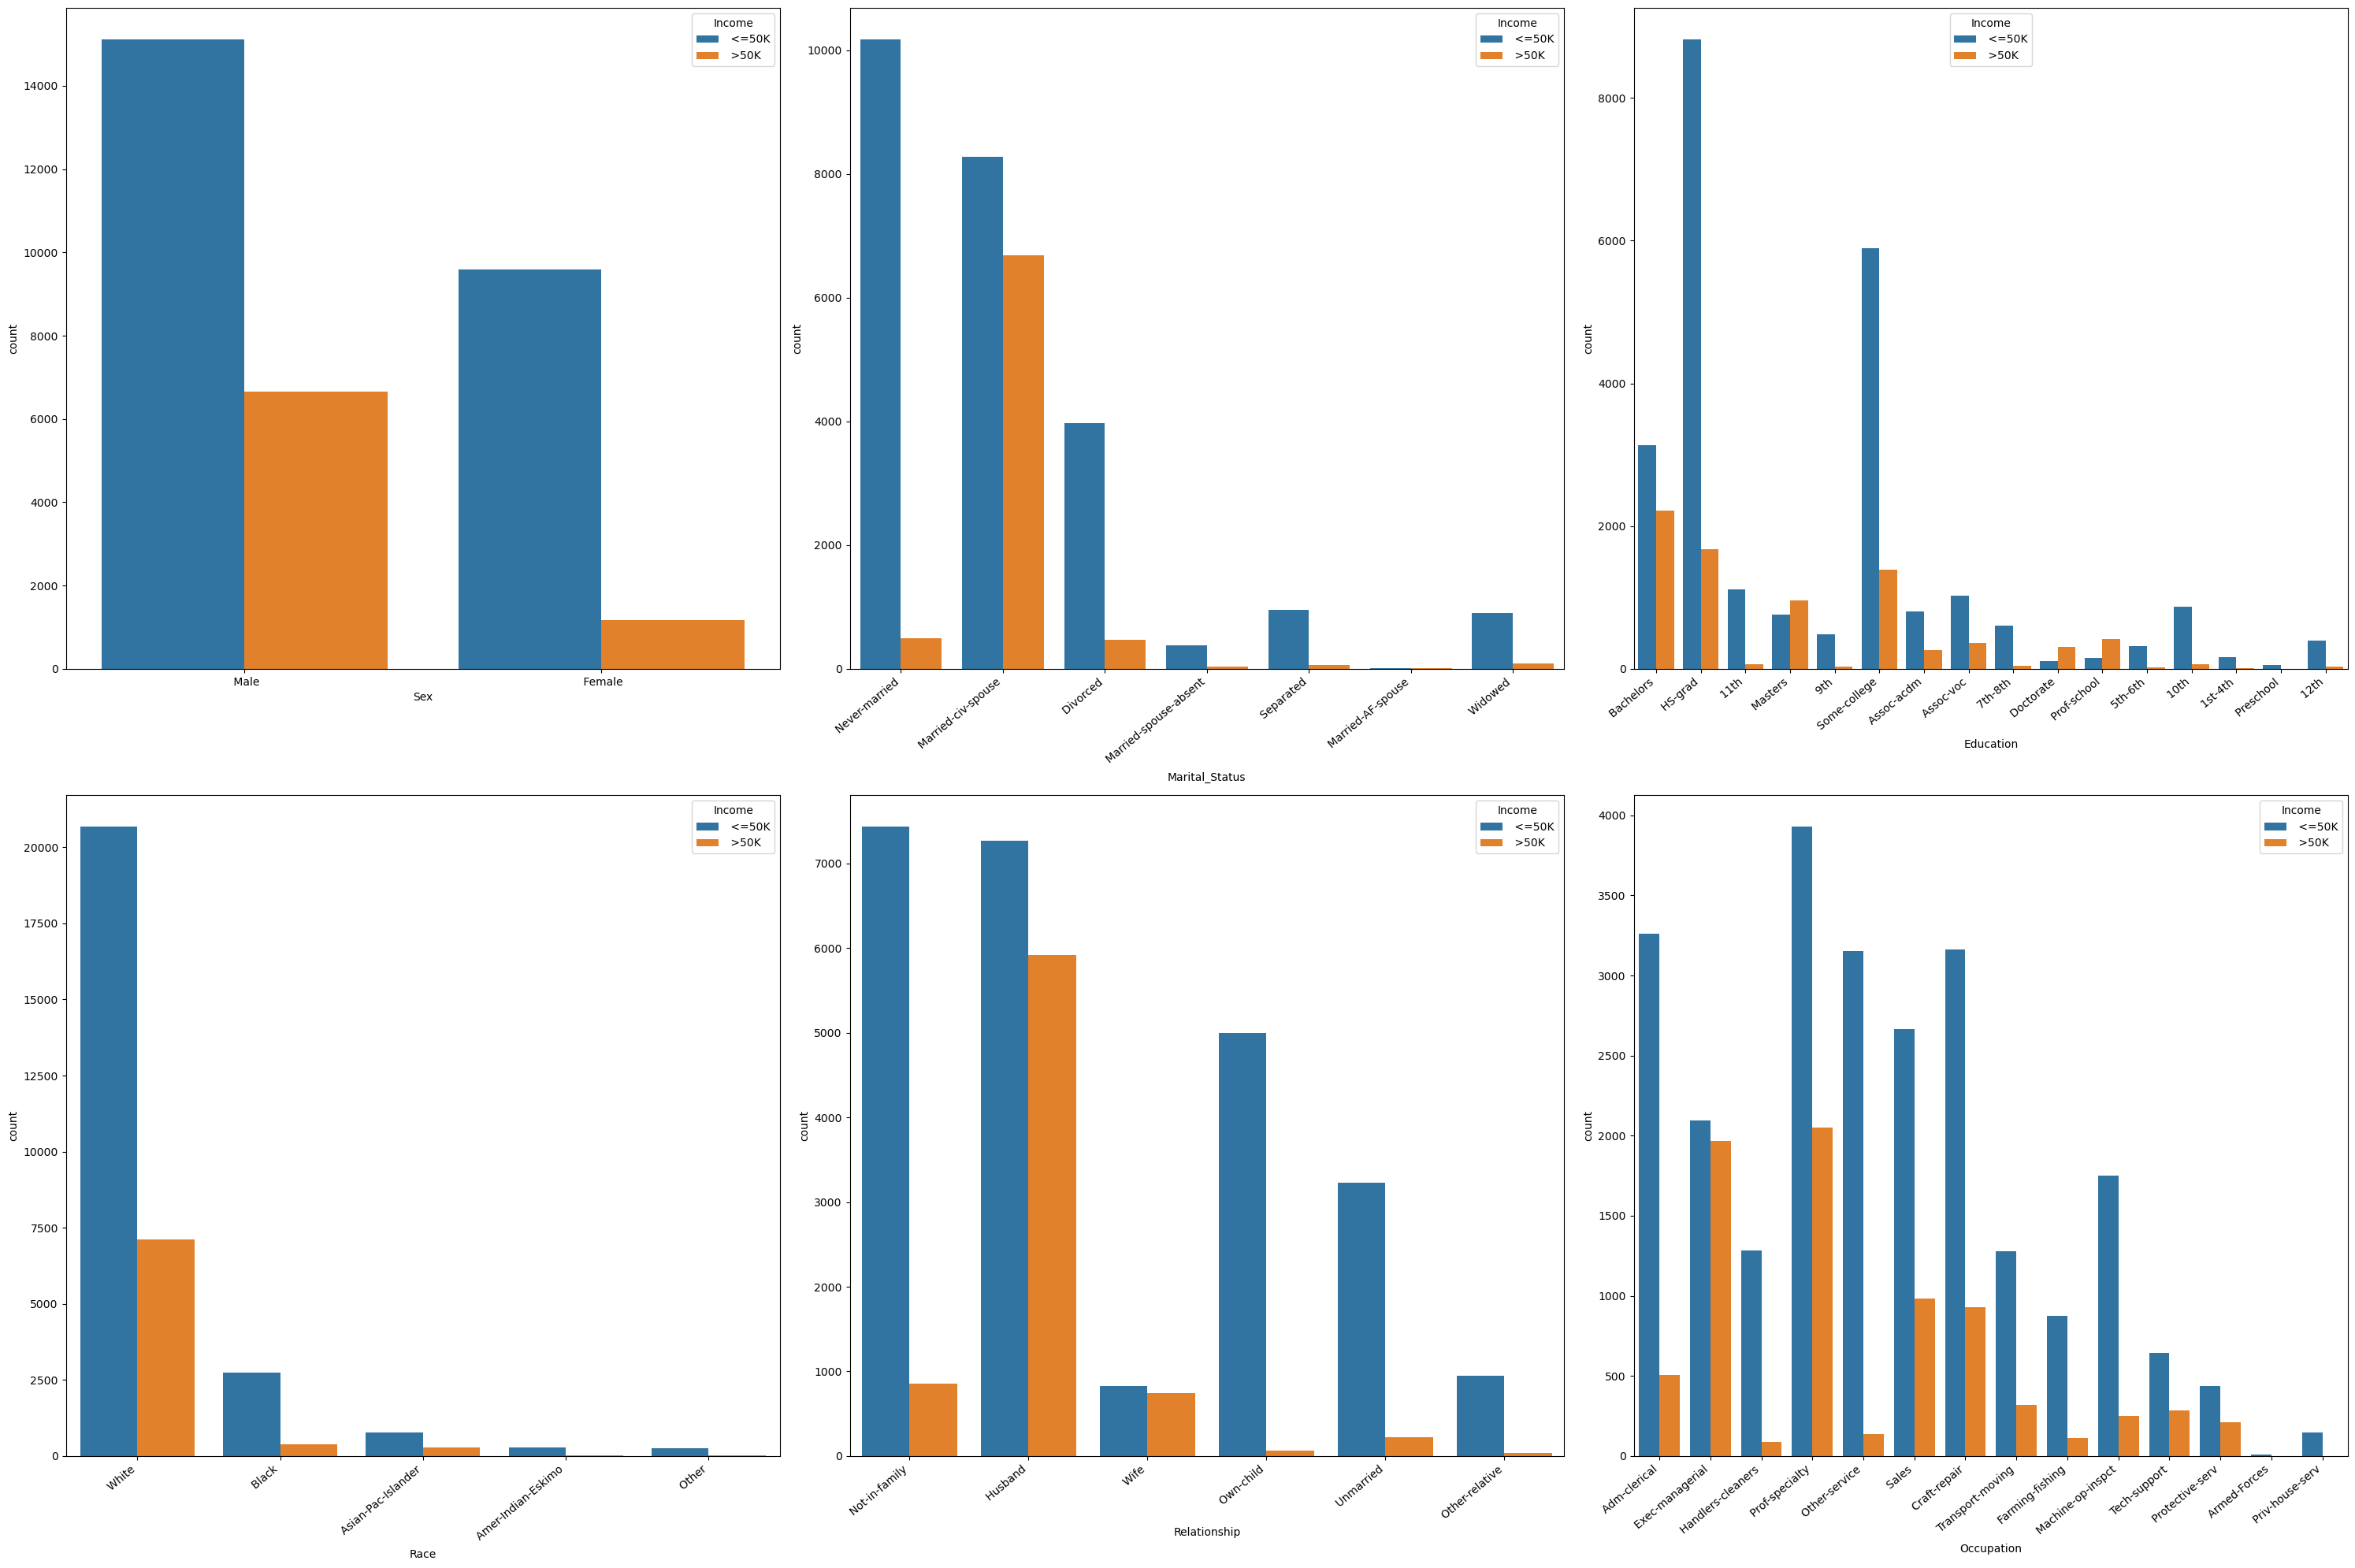

In [76]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="Sex", data=train_data,hue="Income",ax = ax[0][0])
cp = sns.countplot(x="Marital_Status", data=train_data,hue="Income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="Education", data=train_data,hue="Income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="Race", data=train_data,hue="Income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="Relationship", data=train_data,hue="Income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="Occupation", data=train_data,hue="Income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

Here a summary plots of the categorical features is created  

# Convert the categorical features

In [77]:
train_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_Country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


For Train Data

In [78]:
label_encoder = LabelEncoder()
df = train_data
for i in categorical_columns:
    df[i] = label_encoder.fit_transform(train_data[i])
df[categorical_columns].head()


,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_Country,Income
0,6,9,4,0,1,4,1,38,0
1,5,9,2,3,0,4,1,38,0
2,3,11,0,5,1,4,1,38,0
3,3,1,2,5,0,2,1,38,0
4,3,9,2,9,5,2,0,4,0


For Test Data 

In [79]:
label_encoder = LabelEncoder()
df2 = test_data
for i in categorical_columns_2:
   df2[i] = label_encoder.fit_transform(test_data[i])
df2[categorical_columns_2].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_Country,Income
0,3,11,2,4,0,4,1,37,0
1,1,7,2,10,0,4,1,37,1
2,3,15,2,6,0,2,1,37,1
3,3,15,4,9,3,4,0,37,0
4,3,0,4,7,1,4,1,37,0


# Split to X and Y (train and test)

In [80]:
X_train = df.drop('Income', axis=1)
y_train = df["Income"]

# Print the dimensions 
print ("X dimensions: ", X_train.shape)
print ("y dimensions: ", y_train.shape)

X dimensions:  (32537, 14)
y dimensions:  (32537,)


In [81]:
X_unknown = df2
X_unknown = df2.drop('Income', axis=1)
# Print the dimensions
print ("X dimensions: ", X_unknown.shape)

X dimensions:  (16275, 14)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.30, 
                                                    stratify = y_train, 
                                                    random_state=1)

In [83]:
print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (22775, 14) (22775,)
Shape of x_test and y_test:  (9762, 14) (9762,)


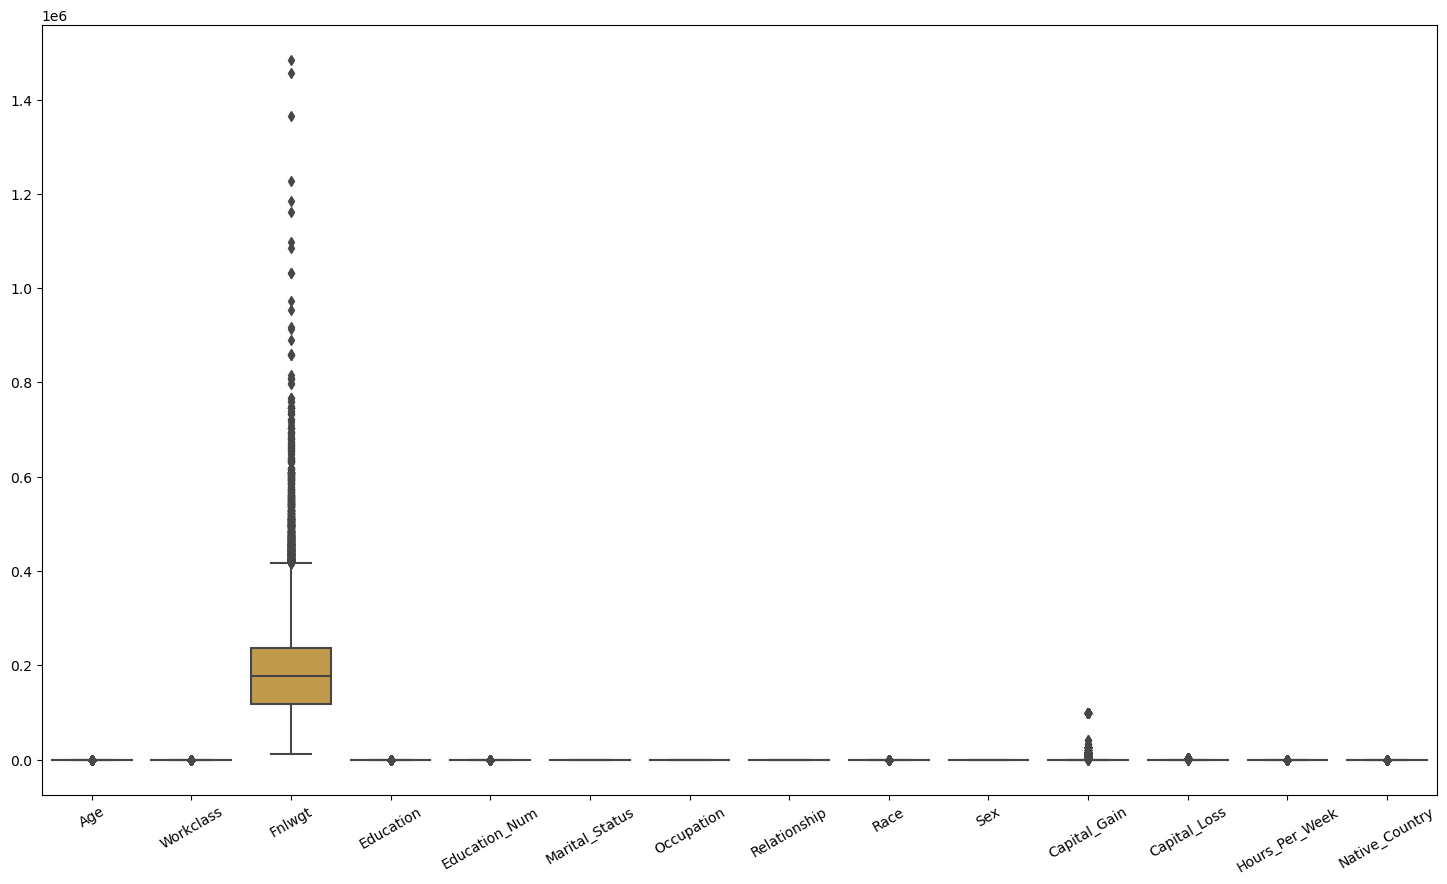

In [84]:
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

From the plot above, the dataset seems to have differencies between the measurements of features which is something that will be fixed applied scaling techniques

# Scaling the data

In [161]:
# Instantiate the StandardScaler() or MinMaxScaler() 
scaler = StandardScaler()

# Fit the scaler ONLY on the training data (and transform 
# - this could be done using two separate steps/functions) 
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Use the fitted scaler to transform the test data 
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

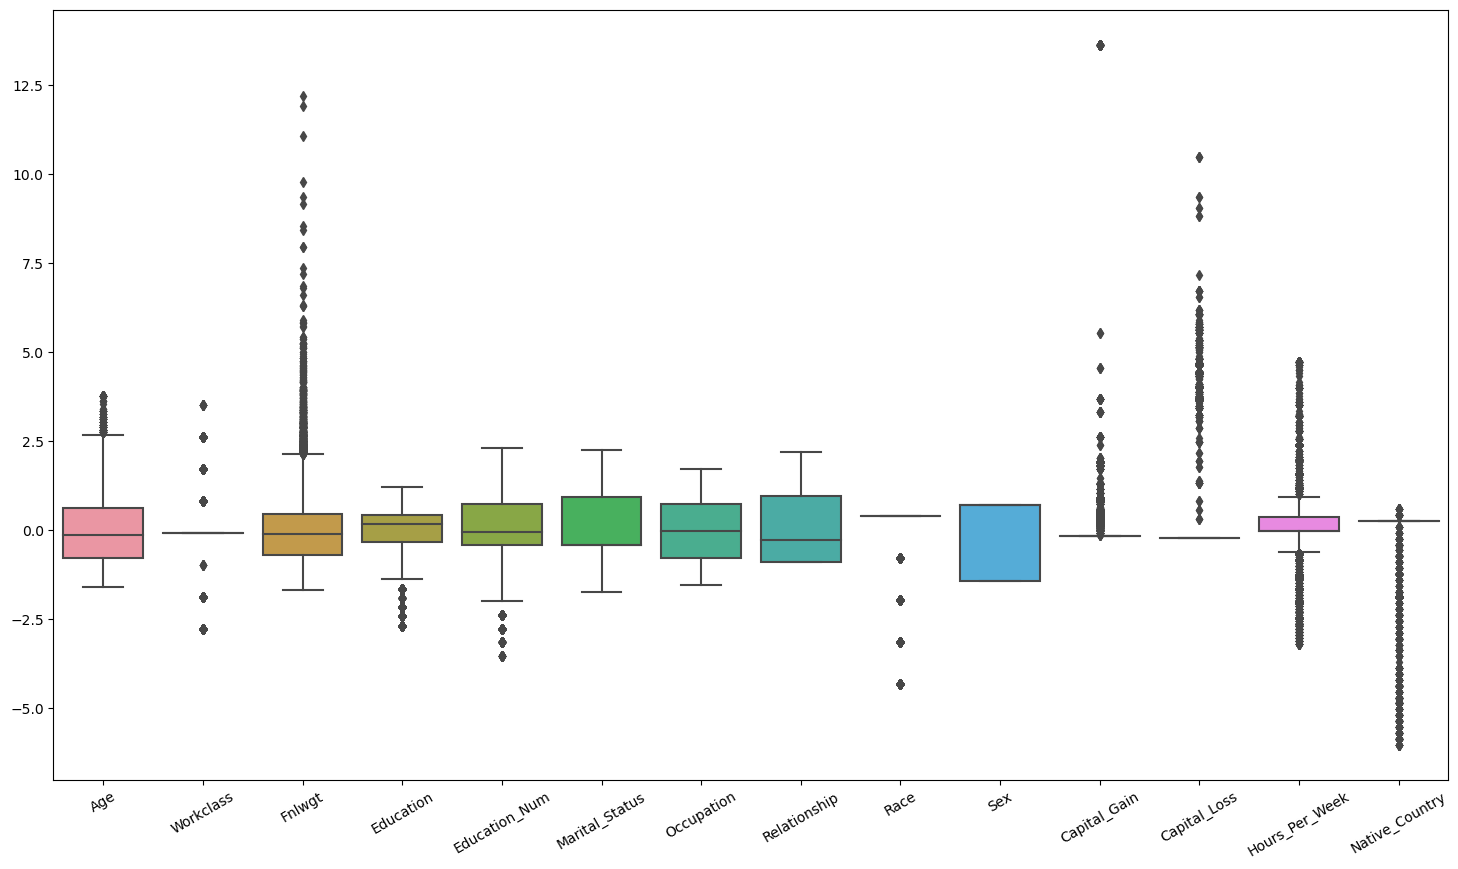

In [86]:
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

# Classifiers 

In [87]:
# Create an empty DataFrame to store and compare evaluation |results 
clf_results = pd.DataFrame([])

# KNN Classifier

In [88]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_knn))

Test set accuracy:  0.828518746158574


In [89]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[6717  693]
 [ 981 1371]]


In [90]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7410
           1       0.66      0.58      0.62      2352

    accuracy                           0.83      9762
   macro avg       0.77      0.74      0.76      9762
weighted avg       0.82      0.83      0.82      9762



Hyperparameter tuning with GridSearchCV

In [91]:
knn_param_grid = dict(n_neighbors = np.arange(1, 25, 2), 
                      weights = ['uniform', 'distance'], 
                      metric = ['minkowski','euclidean','manhattan'])

knn_grid_cv = GridSearchCV(KNeighborsClassifier(), 
                           knn_param_grid, 
                           cv=5)

knn_grid_cv.fit(X_train, y_train) 

# Report the optimal parameters
print("Best parameters: n_neighbors=", knn_grid_cv.best_params_['n_neighbors'])
print("Best parameters: weights =", knn_grid_cv.best_params_['weights'])
print("Best parameters: metric =", knn_grid_cv.best_params_['metric'])

Best parameters: n_neighbors= 23
Best parameters: weights = uniform
Best parameters: metric = manhattan


Let's create the final optimized model using the best parameters as detected from the exhaustive grid search:

In [92]:
knn_opt = knn_grid_cv.best_estimator_
knn_opt.fit(X_train, y_train) 
y_pred_knn_opt = knn_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_knn_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_knn_opt))

Test set accuracy:  0.841

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7410
           1       0.71      0.59      0.64      2352

    accuracy                           0.84      9762
   macro avg       0.79      0.75      0.77      9762
weighted avg       0.83      0.84      0.84      9762



In [93]:
clf_results = clf_results.append({'Model': 'KNN',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_knn_opt), 3)}, 
                                 ignore_index = True)

# Decision Tree Classifier

Let’s start with a decision tree classifier using max_depth=3

In [94]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_dt))

Test set accuracy:  0.8411186232329441


In [95]:
print(metrics.confusion_matrix(y_test, y_pred_dt))

[[7070  340]
 [1211 1141]]


In [96]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7410
           1       0.77      0.49      0.60      2352

    accuracy                           0.84      9762
   macro avg       0.81      0.72      0.75      9762
weighted avg       0.83      0.84      0.83      9762



Decision Tree hyperparameter tuning with GridSearchCV

In [97]:
# Create grid parameters for hyperparameter tuning

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [98]:
# Create gridsearch instance
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [99]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

Build the classifier using the optimal parameters

In [100]:
dt_opt = grid_search.best_estimator_
dt_opt.fit(X_train, y_train) 
y_pred_dt_opt = dt_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_dt_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_dt_opt))

Test set accuracy:  0.853

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      7410
           1       0.76      0.58      0.65      2352

    accuracy                           0.85      9762
   macro avg       0.82      0.76      0.78      9762
weighted avg       0.85      0.85      0.85      9762



In [101]:
clf_results = clf_results.append({'Model': 'Decision Tree',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_dt_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_dt_opt), 3)}, 
                                 ignore_index = True)

# Random Forest Classifier

In [102]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_rf))

Test set accuracy:  0.8581233353820938


In [103]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7410
           1       0.74      0.63      0.68      2352

    accuracy                           0.86      9762
   macro avg       0.82      0.78      0.79      9762
weighted avg       0.85      0.86      0.85      9762



RF hyperparameter tuning with GridSearchCV

In [104]:
# Create the dictionary of hyperparameters 
param_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [105]:
rf_grid_cv = GridSearchCV(rf,param_grid,cv=3,scoring='accuracy')

rf_grid_cv.fit(X_train, y_train)

C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\dchatzopoulou\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy')

In [106]:
print('Best Parameters using grid search: \n', rf_grid_cv.best_params_)

Best Parameters using grid search: 
 {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


 Build the classifier using the optimal parameters

In [107]:
rf_opt = rf_grid_cv.best_estimator_
rf_opt.fit(X_train, y_train) 
y_pred_rf_opt = rf_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_rf_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_rf_opt))

Test set accuracy:  0.865

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      7410
           1       0.77      0.63      0.69      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.78      0.80      9762
weighted avg       0.86      0.87      0.86      9762



In [108]:
clf_results = clf_results.append({'Model': 'Random Forest',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_rf_opt), 3)}, 
                                 ignore_index = True)

# SVM Classifier

 Support Vector Machine (RBF) - benchmark model (default parameters)

In [109]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm.predict(X_test)

print('Accuracy for RBF SVM is:', round(metrics.accuracy_score(y_test, y_pred_rbf_svm), 3))
print('\n', metrics.classification_report(y_test, y_pred_rbf_svm))

Accuracy for RBF SVM is: 0.849

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      7410
           1       0.75      0.56      0.64      2352

    accuracy                           0.85      9762
   macro avg       0.81      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762



 Linear SVM - benchmark model (default parameters)

In [110]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear_svm =linear_svm.predict(X_test)

print('Accuracy for Linear SVM is:', round(metrics.accuracy_score(y_test, y_pred_linear_svm), 3))
print('\n', metrics.classification_report(y_test, y_pred_linear_svm))

Accuracy for Linear SVM is: 0.819

               precision    recall  f1-score   support

           0       0.82      0.98      0.89      7410
           1       0.81      0.32      0.46      2352

    accuracy                           0.82      9762
   macro avg       0.82      0.65      0.68      9762
weighted avg       0.82      0.82      0.79      9762



 Optimal SVM - tune the SVM hyperparameters with GridSearchCV( )

In [111]:
# Create the dictionary of hyperparameters 
param_grid = [ {'C':[0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['rbf'], 
                'gamma':[1, 0.1, 0.01, 0.001, 0.0001,'auto','scale']},
             ]

svm_grid_cv = GridSearchCV(SVC(),
                           param_grid=param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

# Fit the grid or random search model to X_train and y_train 
svm_grid_cv.fit(X_train, y_train)

# Report the optimal parameters using 'cv_svm.best_params_'
print('Best Parameters using grid search: ', svm_grid_cv.best_params_)

Best Parameters using grid search:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


Build the classifier using the optimal parameters detected by the tuning process

In [112]:
svm_opt = svm_grid_cv.best_estimator_
svm_opt.fit(X_train, y_train) 
y_pred_svm_opt = svm_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_svm_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_svm_opt))

Test set accuracy:  0.849

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      7410
           1       0.74      0.58      0.65      2352

    accuracy                           0.85      9762
   macro avg       0.81      0.76      0.78      9762
weighted avg       0.84      0.85      0.84      9762



In [113]:
clf_results = clf_results.append({'Model': 'SVM-RBF',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svm_opt), 3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_svm_opt), 3)}, 
                                 ignore_index = True)

# Logistic Regression

In [114]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_logreg), 3))
print('\n', metrics.classification_report(y_test, y_pred_logreg))

Test set accuracy:  0.83

               precision    recall  f1-score   support

           0       0.85      0.95      0.89      7410
           1       0.73      0.46      0.57      2352

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.82      9762



Hyperparameter tuning with GridSearchCV

In [115]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [116]:
clf_grid_cv = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [117]:
# Fit the grid or random search model to X_train and y_train 
clf_grid_cv.fit(X_train, y_train)

# Report the optimal parameters using 'cv_svm.best_params_'
print('Best Parameters using grid search: ', clf_grid_cv.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Best Parameters using grid search:  {'C': 0.08858667904100823, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _che

In [118]:
# Report the optimal parameters using 'clf_svm.best_params_'
print('Best Parameters using grid search: ', clf_grid_cv.best_params_)

Best Parameters using grid search:  {'C': 0.08858667904100823, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'liblinear'}


Build the classifier using the optimal parameters detected by the tuning process

In [119]:
clf_opt = clf_grid_cv.best_estimator_
clf_opt.fit(X_train, y_train) 
y_pred_clf_opt = clf_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_clf_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_clf_opt))

Test set accuracy:  0.829

               precision    recall  f1-score   support

           0       0.85      0.95      0.89      7410
           1       0.73      0.46      0.56      2352

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



In [120]:
clf_results = clf_results.append({'Model': 'Logistic Regression',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_clf_opt), 3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_clf_opt), 3)}, 
                                 ignore_index = True)

# XGBoost Classifier

In [121]:
pip install xgboost

In [122]:
from xgboost import XGBClassifier

In [123]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [124]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [125]:
from sklearn.model_selection import StratifiedKFold

In [126]:
# Initiate XGBoost Classifier
xgboost = XGBClassifier()
# Print default setting
xgboost.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [127]:
# Train the model
xgboost = XGBClassifier(seed=0).fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_xgboost), 3))
print('\n', metrics.classification_report(y_test, y_pred_xgboost))

Test set accuracy:  0.868

               precision    recall  f1-score   support

           0       0.90      0.94      0.91      7410
           1       0.76      0.65      0.70      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762



Hyperparameter tuning with GridSearchCV

In [128]:
# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [129]:
# Define grid search
xgboost_grid_cv = GridSearchCV(estimator=xgboost, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

# Fit the grid or random search model to X_train and y_train 
xgboost_grid_cv.fit(X_train, y_train)

# Report the optimal parameters using 'cv_svm.best_params_'
print('Best Parameters using grid search: ', xgboost_grid_cv.best_params_)

Best Parameters using grid search:  {'colsample_bytree': 0.5, 'reg_alpha': 0.5, 'reg_lambda': 5}


In [130]:
# Build the classifier using the optimal parameters detected by the tuning process

xgboost_opt = xgboost_grid_cv.best_estimator_
xgboost_opt.fit(X_train, y_train) 
y_pred_xgboost_opt = xgboost_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_xgboost_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_xgboost_opt))

Test set accuracy:  0.868

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.77      0.65      0.70      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762



In [131]:
clf_results = clf_results.append({'Model': 'XGBoost',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_xgboost_opt), 3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_xgboost_opt), 3)}, 
                                 ignore_index = True)

# AdaBoost Classifier

In [132]:
from sklearn.ensemble import AdaBoostClassifier

In [133]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [134]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) 
y_pred_ada_boost = ada_boost.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_ada_boost), 3))
print('\n', metrics.classification_report(y_test, y_pred_ada_boost))

Test set accuracy:  0.862

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      7410
           1       0.77      0.61      0.68      2352

    accuracy                           0.86      9762
   macro avg       0.83      0.78      0.80      9762
weighted avg       0.86      0.86      0.86      9762



In [135]:
# Create the dictionary of model hyperparameters
ada_boost_param_grid = dict()
ada_boost_param_grid['n_estimators'] = [10, 50, 100, 500]
ada_boost_param_grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Hyperparameter tuning with GridSearchCV

ada_grid_cv = GridSearchCV(estimator=ada_boost, param_grid=ada_boost_param_grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
ada_grid_cv.fit(X_train, y_train) 

# summarize the best score and configuration
print("Best: %f using %s" % (ada_grid_cv.best_score_, ada_grid_cv.best_params_))

Best: 0.869374 using {'learning_rate': 1.0, 'n_estimators': 500}


Build the classifier using the optimal parameters detected by the tuning process

In [136]:
ada_opt = ada_grid_cv.best_estimator_
ada_opt.fit(X_train, y_train) 
y_pred_ada_opt = ada_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_ada_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_ada_opt))

Test set accuracy:  0.871

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.79      0.64      0.70      2352

    accuracy                           0.87      9762
   macro avg       0.84      0.79      0.81      9762
weighted avg       0.87      0.87      0.87      9762



In [137]:
clf_results = clf_results.append({'Model': 'Adaboost',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_ada_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_ada_opt), 3)}, 
                                 ignore_index = True)

# LightGBM Classifier

In [138]:
!pip install lightgbm

In [139]:
from lightgbm import LGBMClassifier

In [140]:
VERBOSE=1
lgb = LGBMClassifier(verbosity=VERBOSE,
                        random_state=0,
                        n_jobs=5)

In [141]:
lgb.fit(X_train, y_train)
y_pred_lgb =lgb.predict(X_test)

print('Accuracy for Boosting lightgbm is:', round(metrics.accuracy_score(y_test, y_pred_lgb), 3))
print('\n', metrics.classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 5487, number of negative: 17288
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 22775, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240922 -> initscore=-1.147631
[LightGBM] [Info] Start training from score -1.147631
Accuracy for Boosting lightgbm is: 0.87

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.77      0.65      0.71      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.80      0.81      9762
weighted avg       0.87      0.87      0.87      9762



Hyperparameter tuning with GridSearchCV

In [142]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_samples': [1, 5, 10]
 }   

light_grid_cv = GridSearchCV(estimator=lgb,
                             param_grid=param_grid,
                             cv=3,
                             n_jobs=-1,
                             scoring='neg_root_mean_squared_error')
# execute the grid search
light_grid_cv.fit(X_train, y_train)                              

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5487, number of negative: 17288
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 22775, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240922 -> initscore=-1.147631
[LightGBM] [Info] Start training from score -1.147631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

GridSearchCV(cv=3,
             estimator=LGBMClassifier(n_jobs=5, random_state=0, verbosity=1),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.1, 0.01], 'max_depth': [4, 6],
                         'min_child_samples': [1, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_root_mean_squared_error')

In [143]:
# summarize the best score and configuration
print("Best: %f using %s" % (light_grid_cv.best_score_, light_grid_cv.best_params_))

Best: -0.356635 using {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 5, 'n_estimators': 150, 'subsample': 0.7}


In [144]:
# Build the classifier using the optimal parameters detected by the tuning process

light_opt = light_grid_cv.best_estimator_
light_opt.fit(X_train, y_train) 
y_pred_light_opt = light_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_light_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_light_opt))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5487, number of negative: 17288
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 22775, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240922 -> initscore=-1.147631
[LightGBM] [Info] Start training from score -1.147631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [145]:
clf_results = clf_results.append({'Model': 'Lightgbm',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_light_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_light_opt), 3)}, 
                                 ignore_index = True)

# Naive Bayes Classifier

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
nb = GaussianNB()
nb.fit(X_train, y_train) 
y_pred_nb = nb.predict(X_test)
print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_nb), 3))
print('\n', metrics.classification_report(y_test, y_pred_nb))

Test set accuracy:  0.809

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7410
           1       0.70      0.36      0.47      2352

    accuracy                           0.81      9762
   macro avg       0.76      0.66      0.68      9762
weighted avg       0.79      0.81      0.78      9762



Hyperparameter tuning with GridSearchCV

In [148]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_grid_cv = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


In [149]:
nb_grid_cv.fit(X_train,y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [150]:
print('Best Parameters using grid search: \n', nb_grid_cv.best_params_)

Best Parameters using grid search: 
 {'var_smoothing': 0.0657933224657568}


In [151]:
# Build the classifier using the optimal parameters detected by the tuning process

nb_opt = nb_grid_cv.best_estimator_
nb_opt.fit(X_train, y_train) 
y_pred_nb_opt = nb_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_nb_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_nb_opt))

Test set accuracy:  0.822

               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7410
           1       0.75      0.39      0.51      2352

    accuracy                           0.82      9762
   macro avg       0.79      0.67      0.70      9762
weighted avg       0.81      0.82      0.80      9762



In [152]:
clf_results = clf_results.append({'Model': 'Naive Bayes',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_nb_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_nb_opt), 3)}, 
                                 ignore_index = True)

# Ensemble with Voting (heterogeneous models) Classifier

In [153]:
from sklearn.ensemble import VotingClassifier

# Build a Voting Ensemble model with some heterogeneous models with pre-defined parameters 
# Alternatively, you can use the combination of optimized (tuned) models 

ensemble =VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=21)),
                                      ('SVM-RBF', SVC(probability=True, kernel='rbf', C=100,gamma=0.01)),
                                      ('Random Forest',RandomForestClassifier(n_estimators=200,random_state=0)),
                                      ('Logistic Regression',  LogisticRegression(C=0.08)),
                                      ('Decision Tree',  DecisionTreeClassifier(random_state=0)),
                                      ('NB',  GaussianNB()),
                                      ('XGBoost', XGBClassifier()),
                                      ('Lightgbm', LGBMClassifier()),
                                       ('Adaboost', AdaBoostClassifier()),
                                     ], 
                       voting='soft')

ensemble.fit(X_train, y_train) 
y_pred_ensemble = ensemble.predict(X_test)

print('The accuracy for ensembled model is:', ensemble.score(X_test, y_test))
print('\n', metrics.classification_report(y_test, y_pred_ensemble))

The accuracy for ensembled model is: 0.8657037492317148

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      7410
           1       0.81      0.58      0.68      2352

    accuracy                           0.87      9762
   macro avg       0.84      0.77      0.80      9762
weighted avg       0.86      0.87      0.86      9762



In [159]:
clf_results = clf_results.append({'Model': 'Ensemble with Voting',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_ensemble),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_ensemble), 3)}, 
                                 ignore_index = True)

# Compare the models

In [160]:
clf_results.sort_values(by='Accuracy', ascending=False, inplace=True)
clf_results

,Model,Accuracy,F1
0,Lightgbm,0.872,0.709
1,Adaboost,0.871,0.704
2,XGBoost,0.868,0.704
9,Ensemble with Voting,0.866,0.676
3,Random Forest,0.865,0.692
4,Decision Tree,0.853,0.654
5,SVM-RBF,0.849,0.649
6,KNN,0.841,0.640
7,Logistic Regression,0.829,0.564
8,Naive Bayes,0.822,0.512


Comparing the results of the given models, we realize that Lightgbm model have brought the best results and will be used for the income prediction

# Feature Importance For the top 3 Models

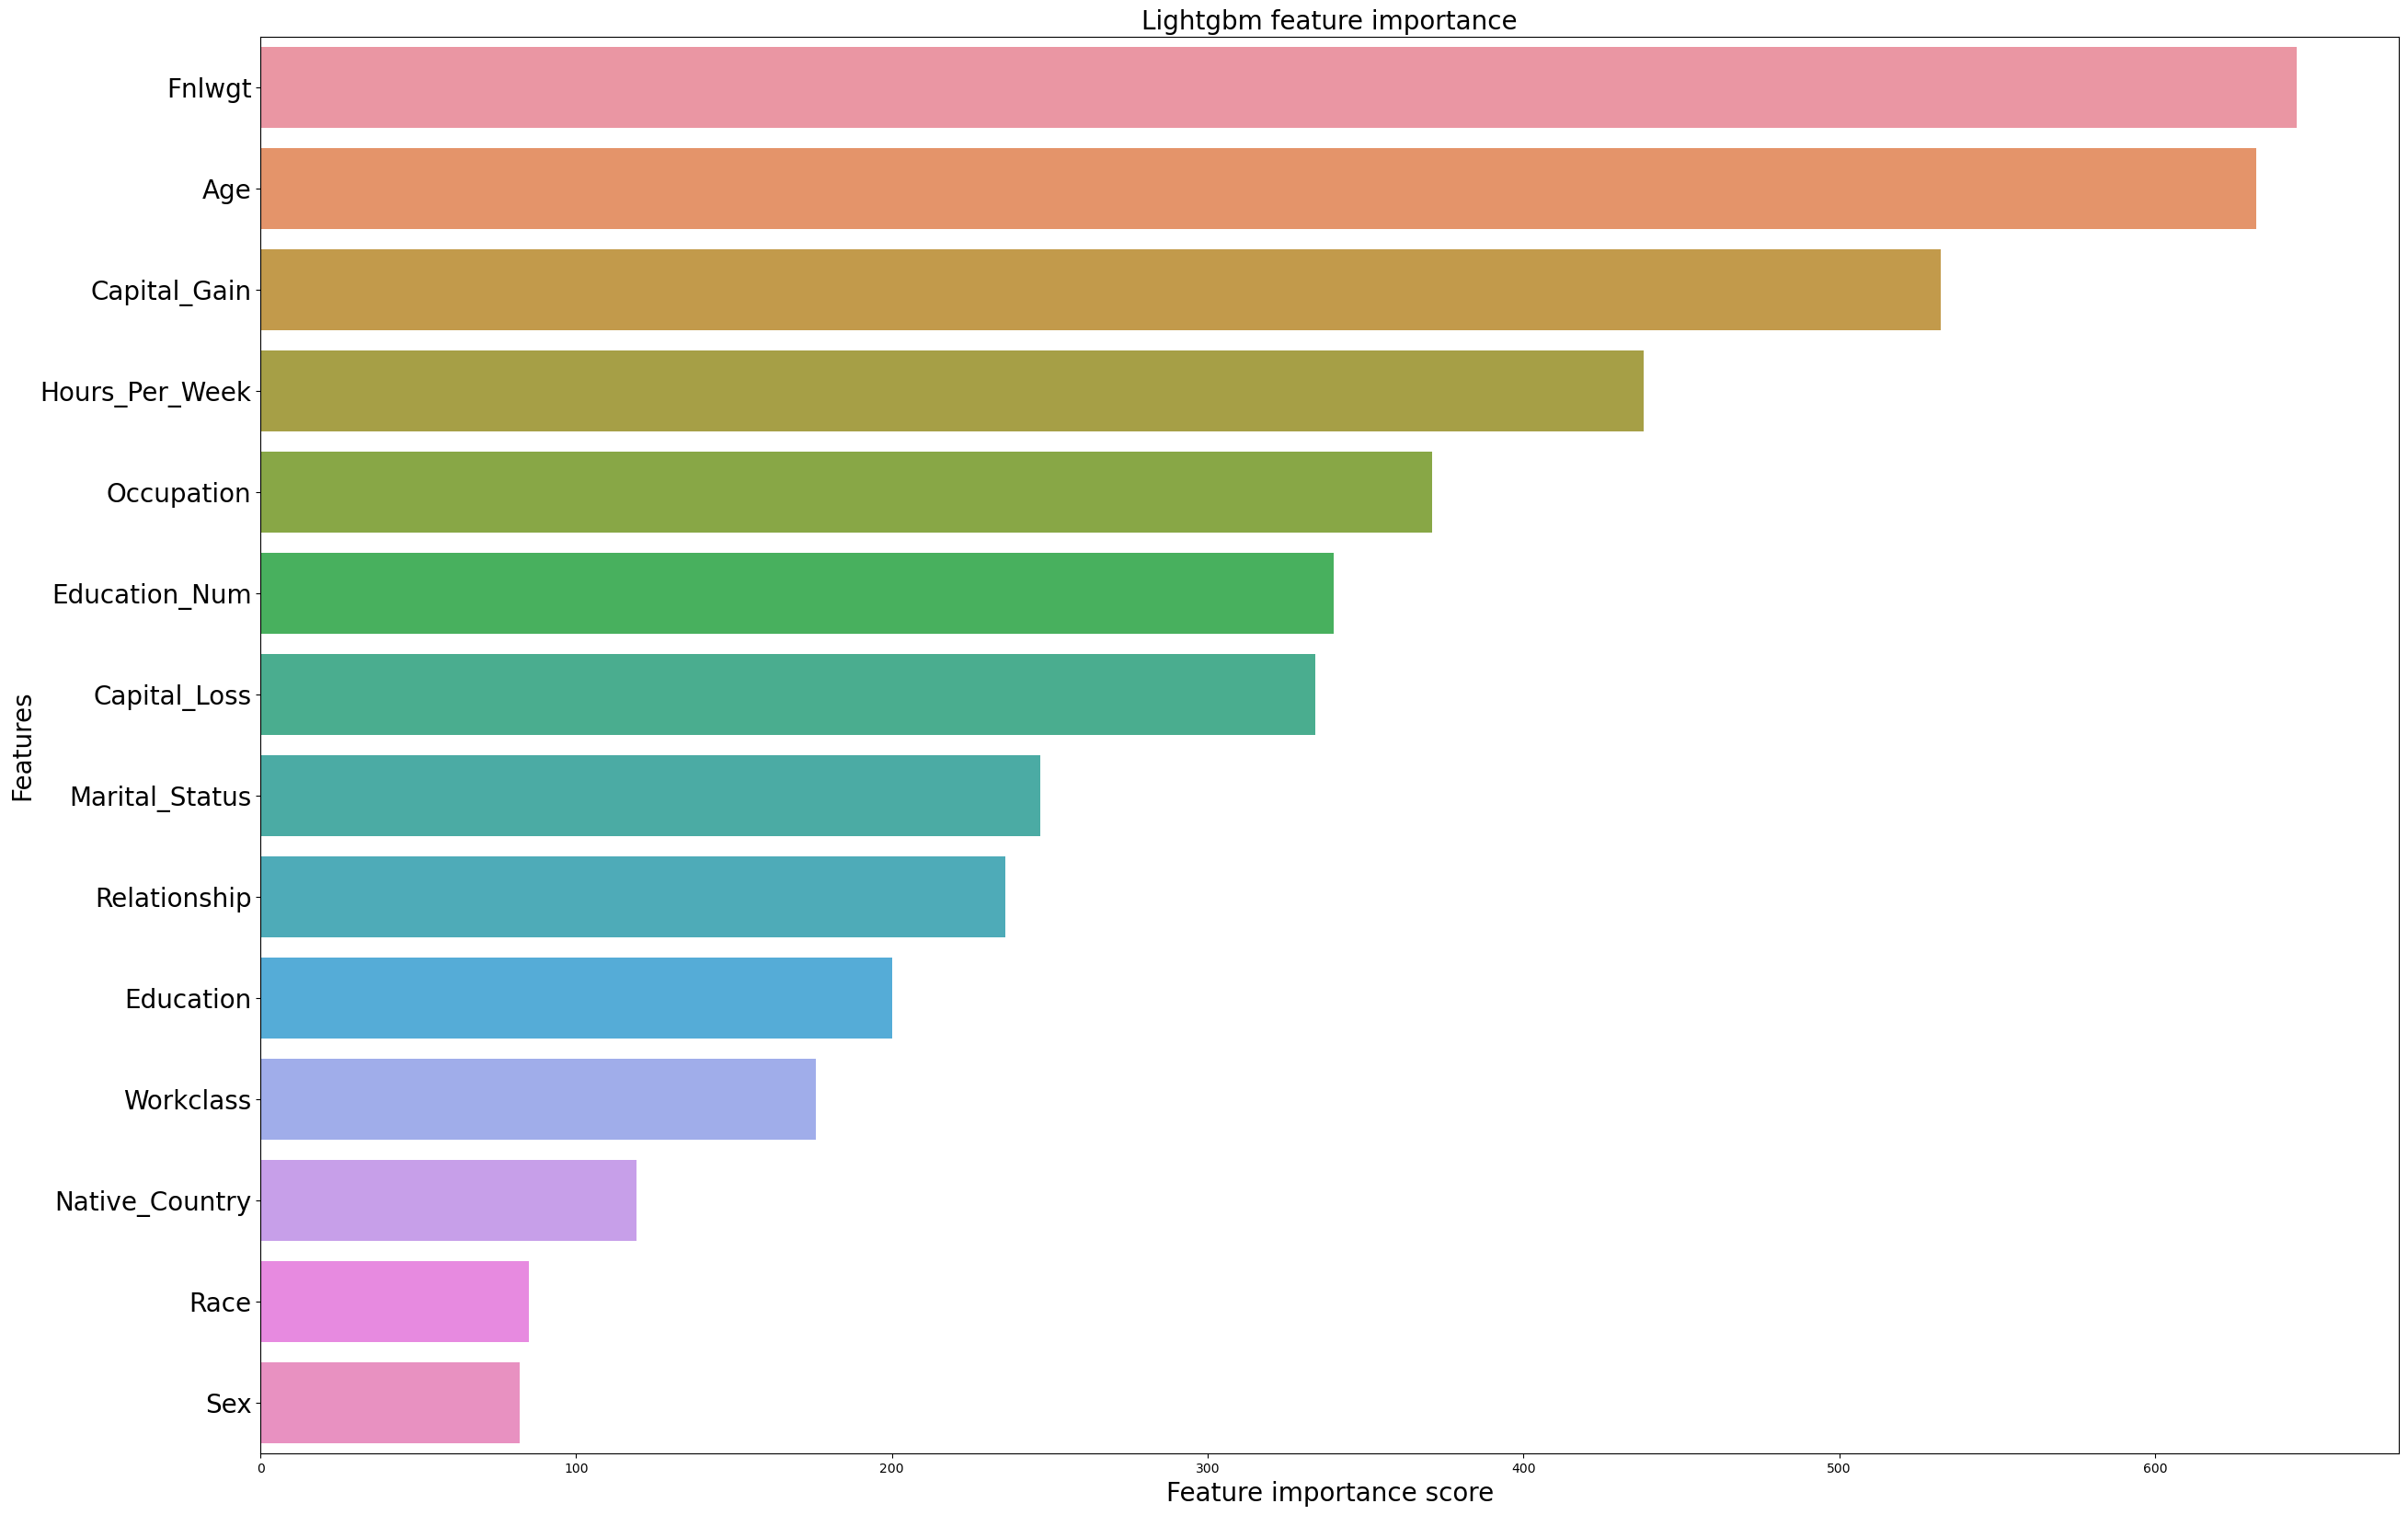

In [168]:
# Get the feature importance from the Lightgbm Classifier
feature_scores = pd.DataFrame(light_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 

# Plot the rf_opt.feature_importances_ in a barplot 
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("Lightgbm feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

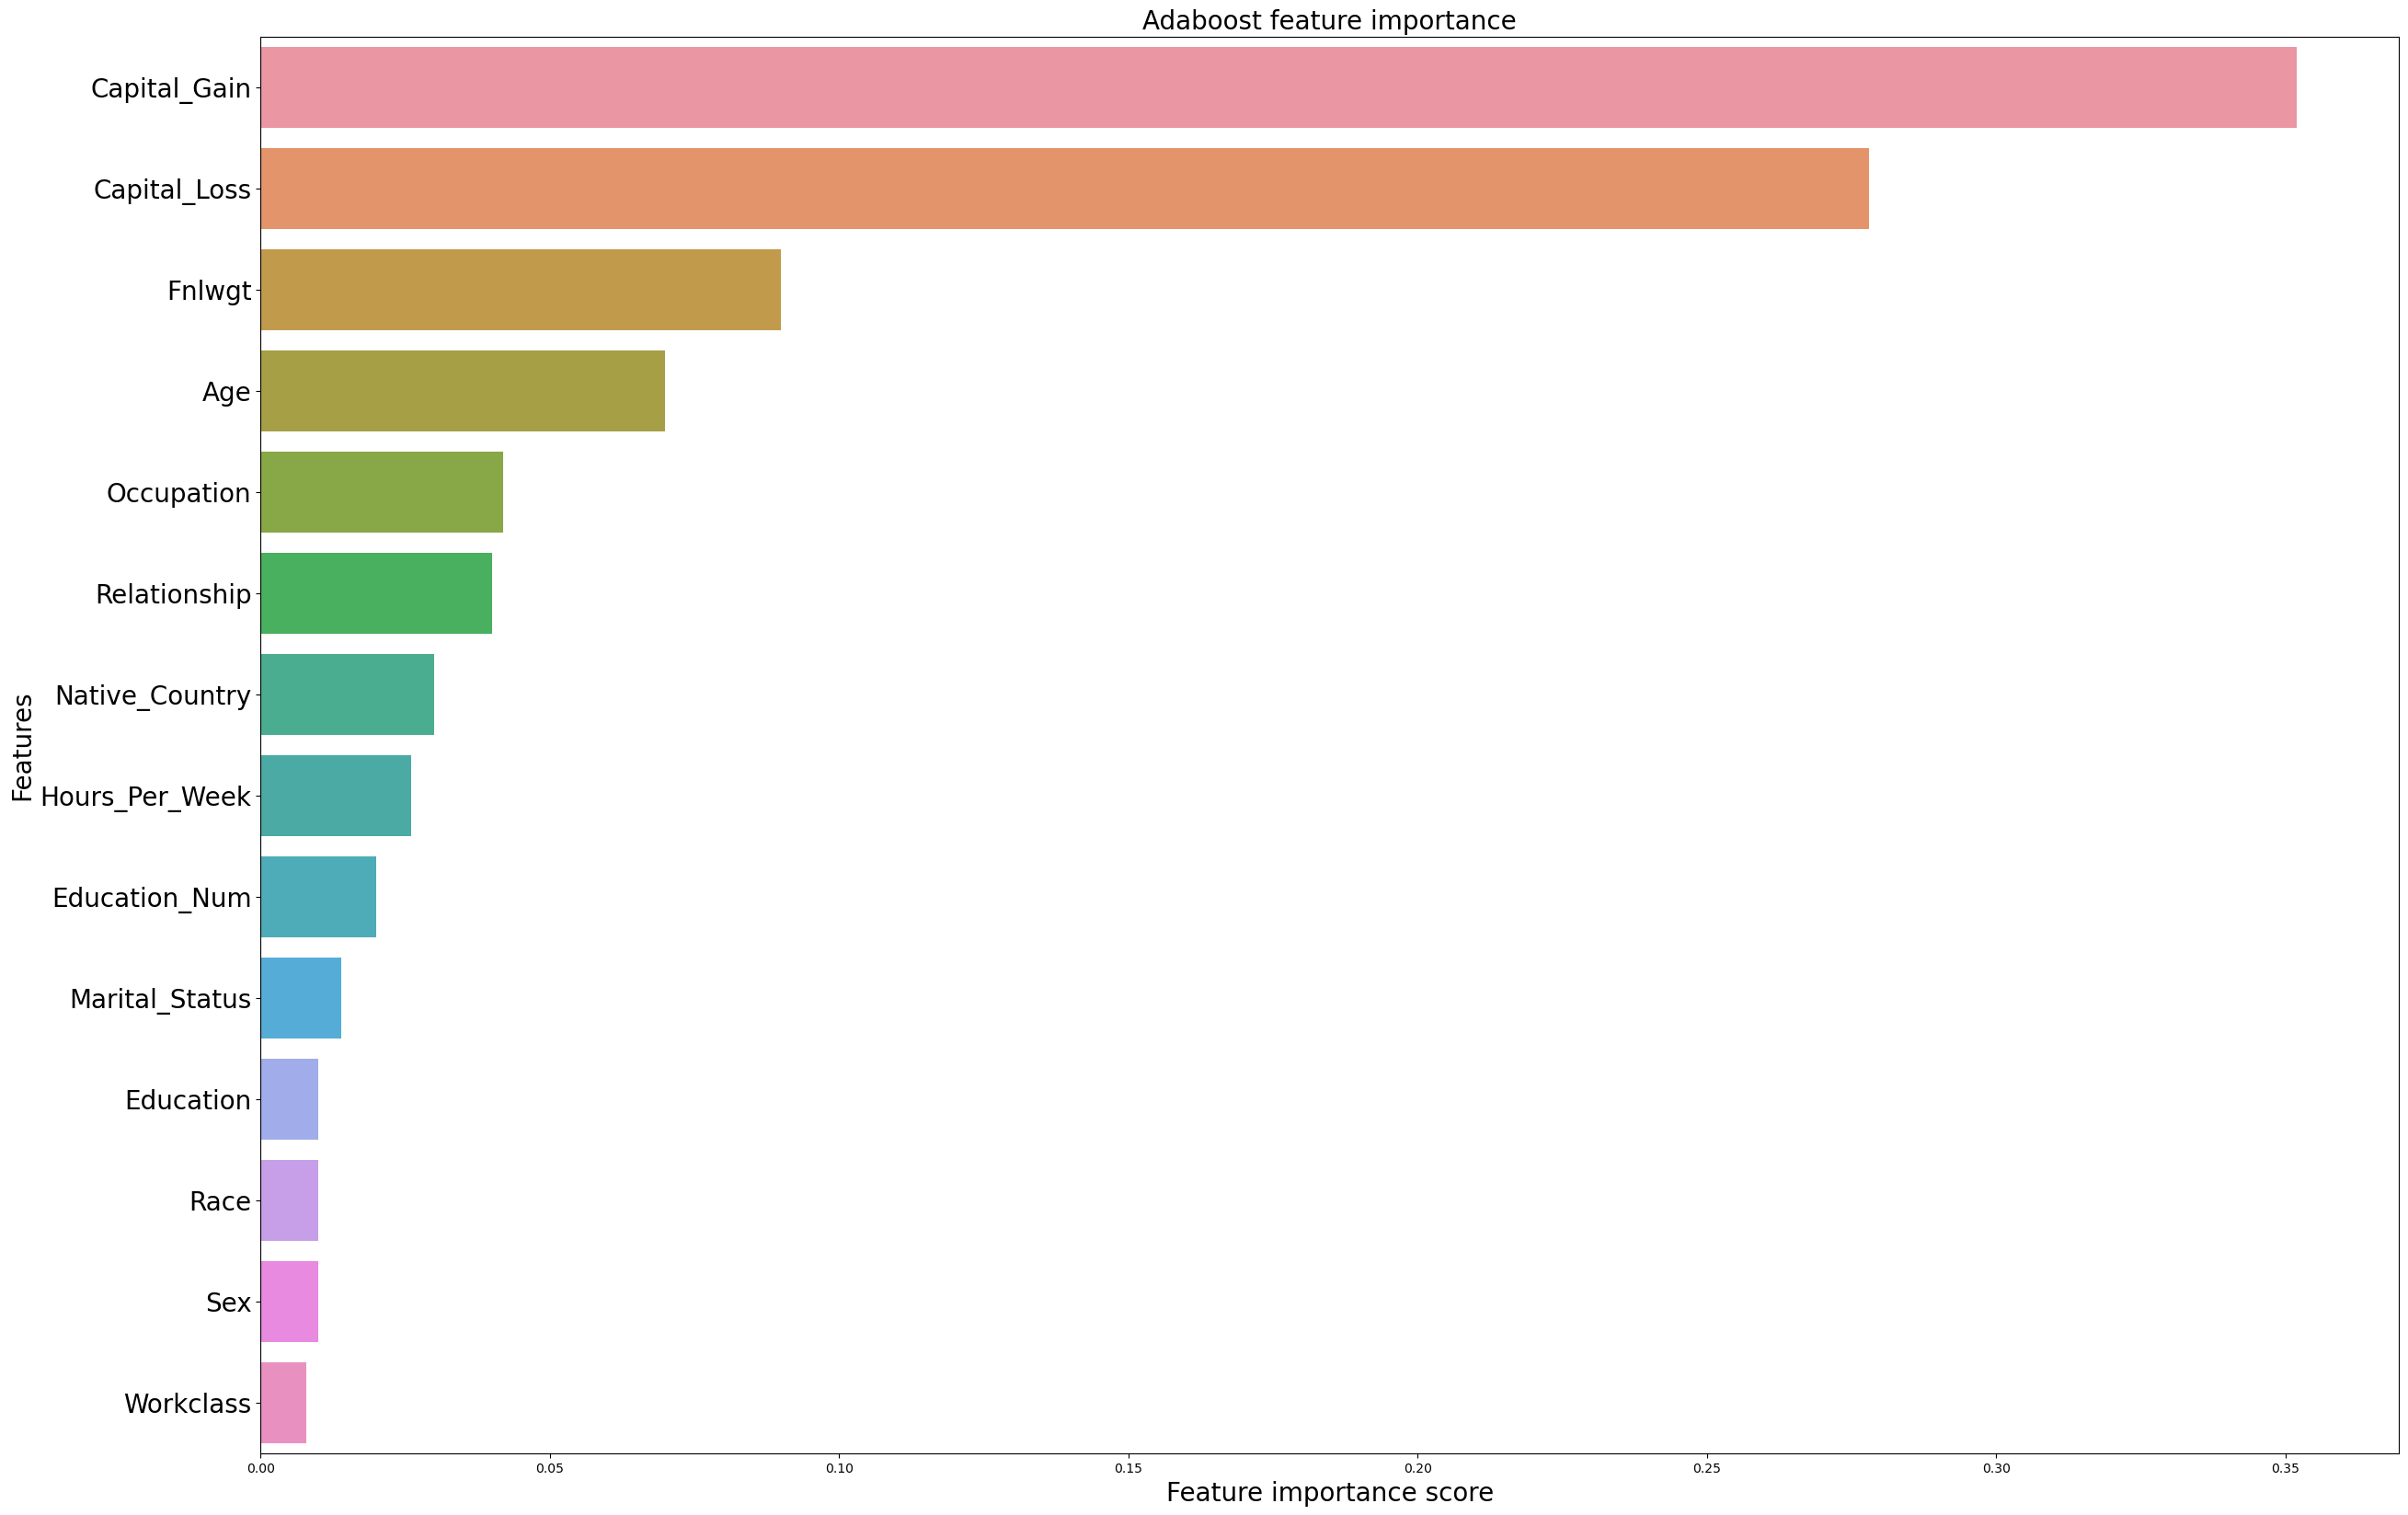

In [167]:
# Get the feature importance from the Adaboost Classifier
feature_scores = pd.DataFrame(ada_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 

# Plot the rf_opt.feature_importances_ in a barplot 
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("Adaboost feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

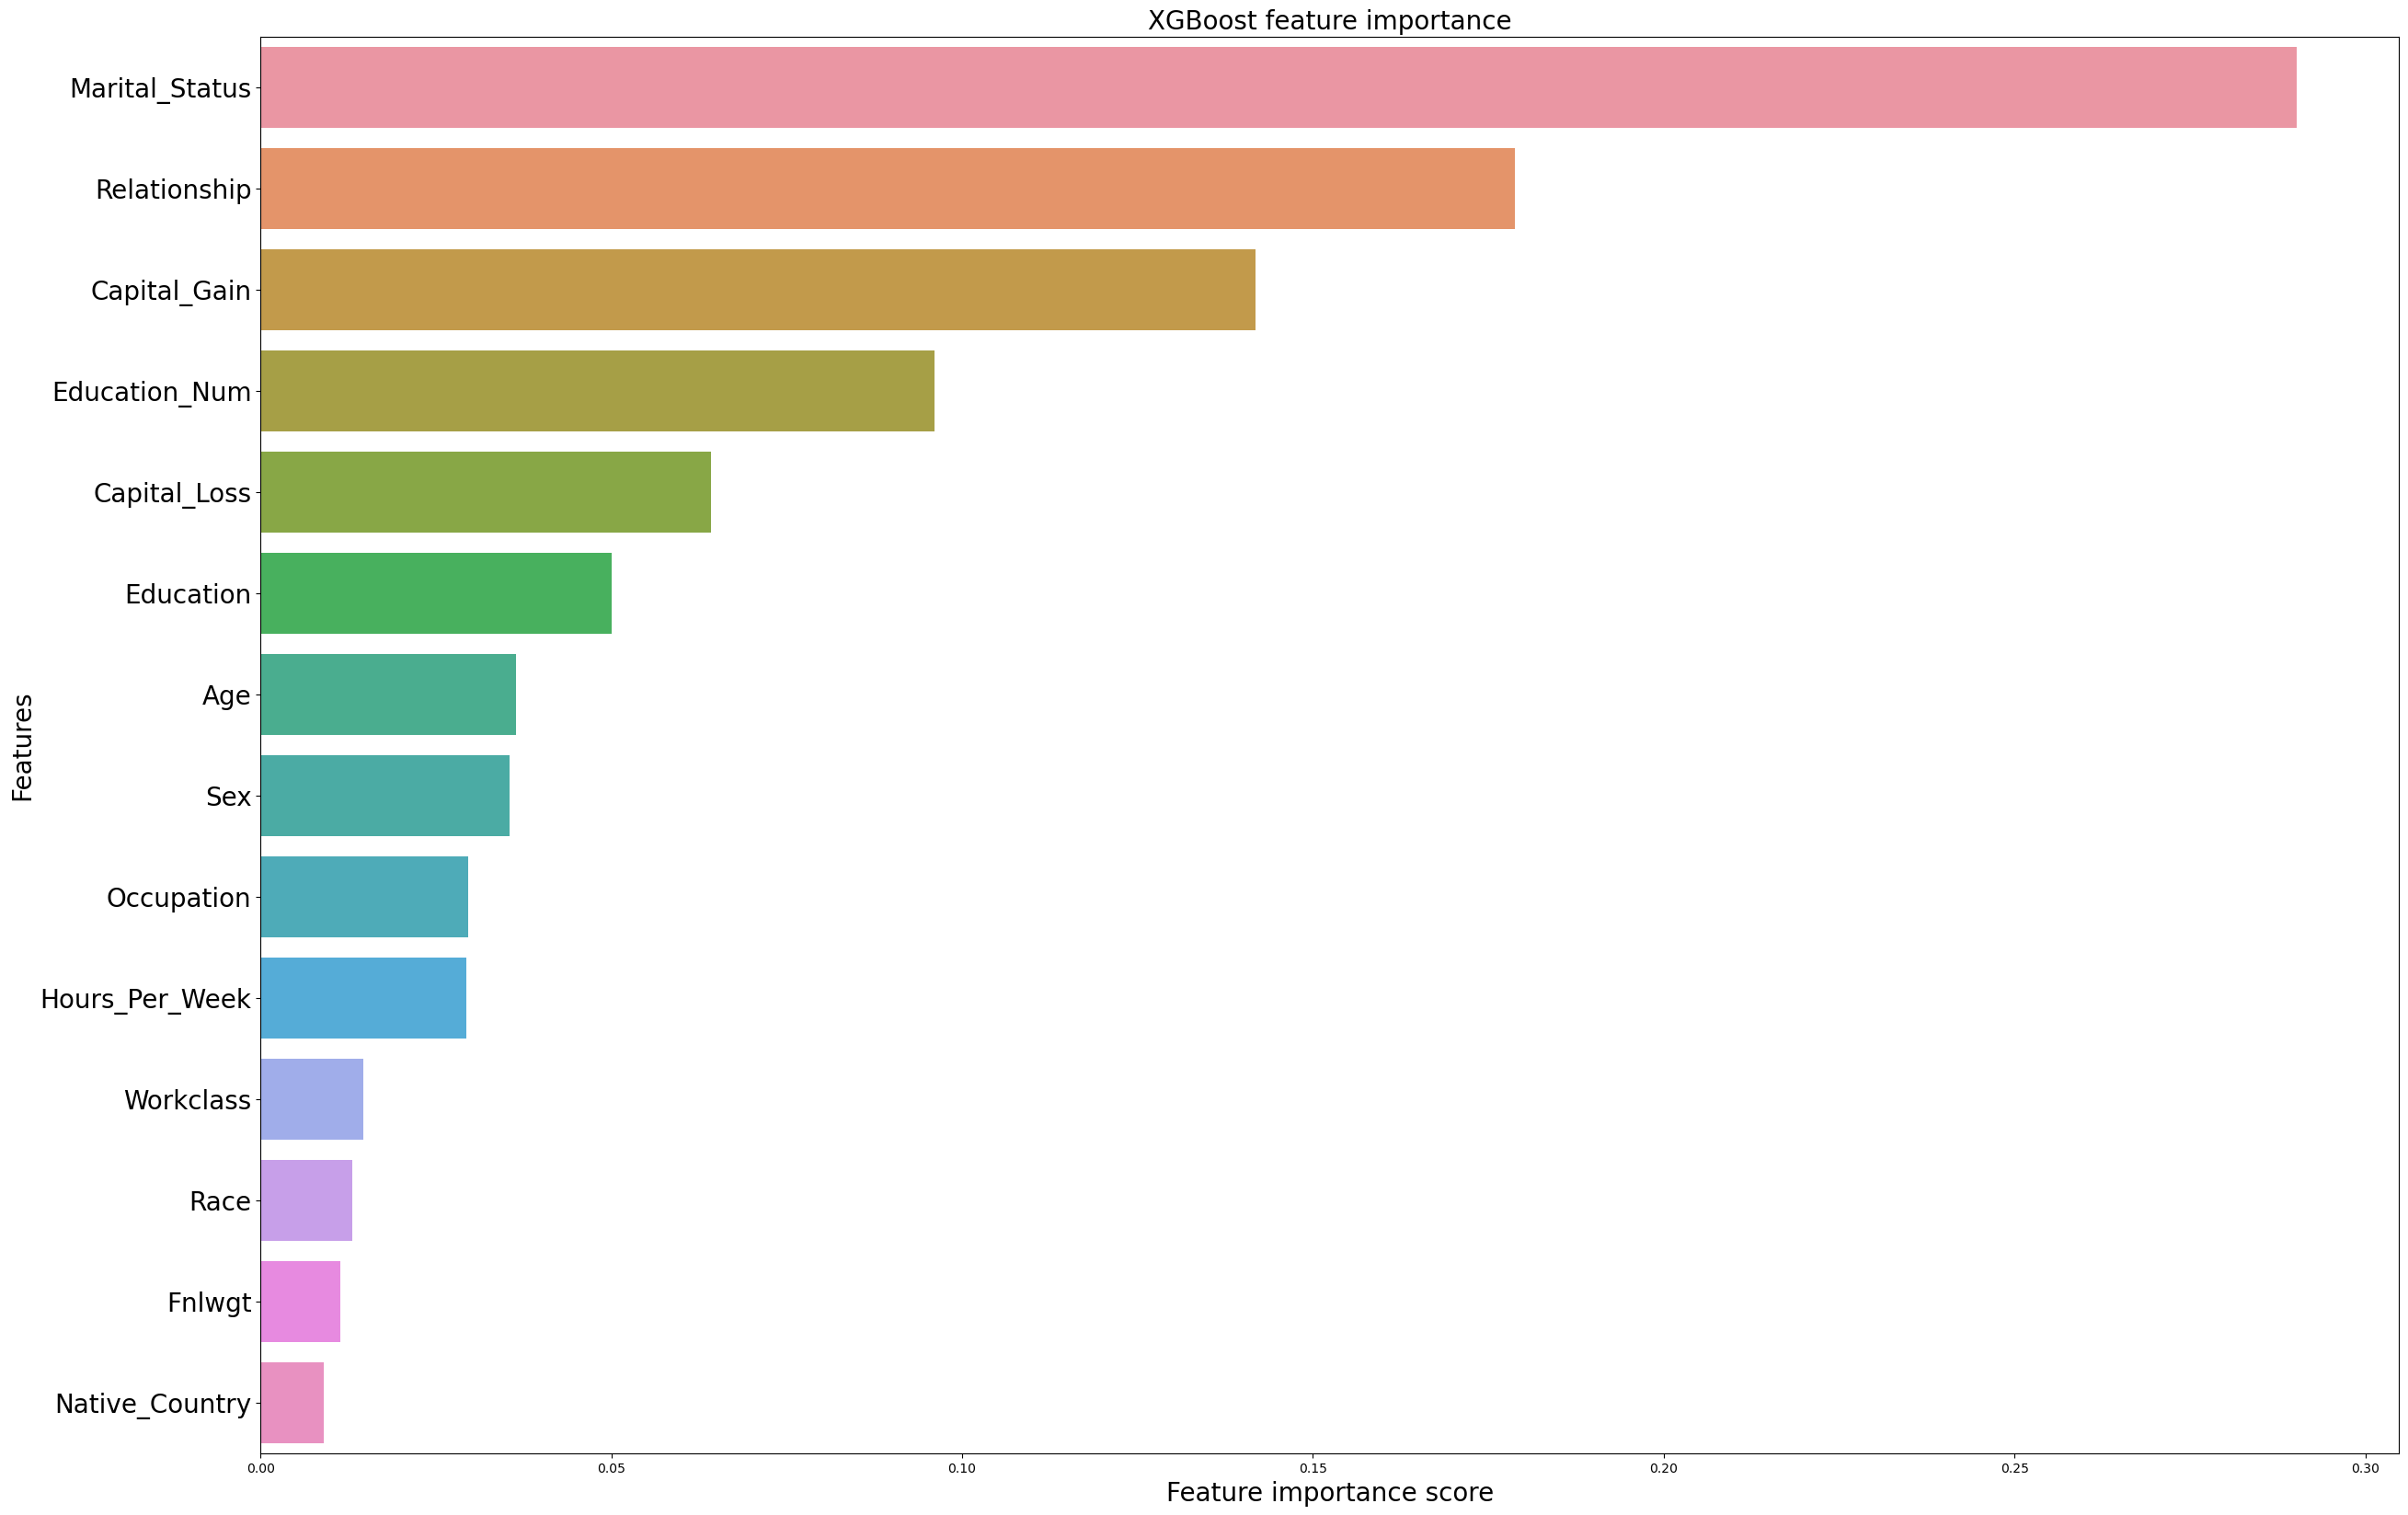

In [166]:
# Get the feature importance from the D Classifier
feature_scores = pd.DataFrame(xgboost_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 

# Plot the rf_opt.feature_importances_ in a barplot 
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("XGBoost feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

# Classifiers - Predict the unknown test set

In [155]:
X_unknown_sc  = scaler.fit_transform(X_unknown)

In [156]:
X_unknown_sc.shape

(16275, 14)

# Use the single optimal (tuned) model

In [157]:
y_pred_unknown = light_opt.predict(X_unknown_sc)

In [158]:
print(y_pred_unknown)

[0 0 1 ... 1 1 1]
